In [3]:
# tools for handling files
import sys
import os

# pandas/numpy for handling data
import pandas as pd
import numpy as np

# seaborn/matplotlib for graphing
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from statistics import mean 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# regex
import re

# for reading individual telomere length data from files
from ast import literal_eval

# for grabbing individual cells
import more_itertools

# my module containing functions for handling/visualizing/analyzing telomere length/chr rearrangement data
import telomere_methods_rad_patient as trp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# setting darkgrid style for seaborn figures
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# imputation ... MICE .. simple principle components 

In [3]:
# support vector machines 
# good for high dimensional low sample data
#see if makes improvements 

---

&nbsp;

...

&nbsp;

---

# Analyzing Telomere Length Data from TeloFISH
---

## Mean Telomere Length analyses

### Visualizations

In [118]:
all_patients_df = pd.read_csv('../compiled patient data csv files/all_patients_df.csv')
all_patients_df['telo data'] = all_patients_df['telo data'].map(literal_eval)
all_patients_df.head()

,patient id,timepoint,telo data,chr data,status,telo means,Q1,Q2-3,Q4
0,1,1 non irrad,"[106.6424579997861, 57.016759722657916, 60.184...",chr data,IT WORKS PEGGY <333,84.796738,1195.0,2214.0,1191.0
1,1,2 irrad @ 4 Gy,"[96.0837987918865, 55.960893801867954, 136.206...",chr data,IT WORKS PEGGY <333,90.975987,724.0,2343.0,1533.0
2,1,3 B,"[98.19553063346642, 148.87709483138457, 115.08...",chr data,IT WORKS PEGGY <333,116.780229,231.0,1448.0,2921.0
3,1,4 C,"[59.12849156423784, 98.19553063346642, 116.145...",chr data,IT WORKS PEGGY <333,99.346663,372.0,2210.0,2018.0
4,2,1 non irrad,"[148.49053578019922, 54.085956741132165, 132.7...",chr data,IT WORKS PEGGY <333,119.774143,1166.0,2262.0,1172.0


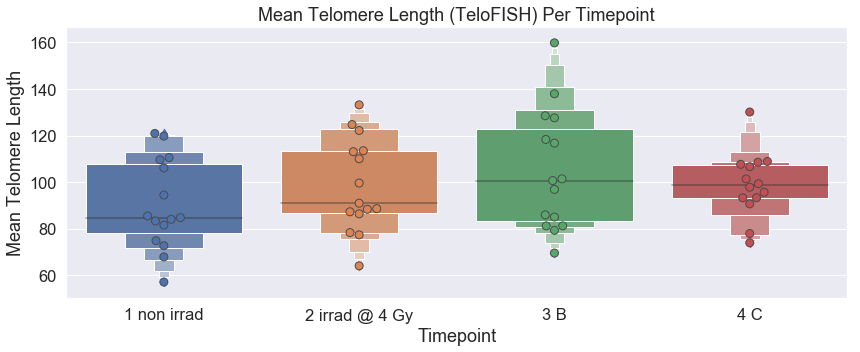

In [10]:
fig = plt.figure(figsize=(14,5))
ax = sns.set(font_scale = 1.5)
ax = sns.boxenplot(x='timepoint',y='telo means', data=all_patients_df,
                  linewidth=1)
ax = sns.swarmplot(x='timepoint',y='telo means', data=all_patients_df, size=8,
                  linewidth=1)

ax.set_title("Mean Telomere Length (TeloFISH) Per Timepoint") 
ax.set_ylabel('Mean Telomere Length')
ax.set_xlabel('Timepoint')
plt.savefig('../graphs/telomere length/all patient telomere length means teloFISH.png', dpi=400)

### Correlations, Linear Regressions

In [120]:
lin_reg_df = all_patients_df.pivot(index='patient id', columns='timepoint', values='telo means')
lin_reg_df = lin_reg_df.drop(13)
lin_reg_df['constant'] = 1

lin_reg_df.head(4)

timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,constant
patient id,,,,,
1,84.796738,90.975987,116.780229,99.346663,1
2,119.774143,133.199629,159.828115,108.915685,1
3,83.351204,87.295754,101.433049,95.669819,1
5,85.506373,113.096219,118.340987,97.832439,1


In [121]:
lin_reg_df.corr()

timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,constant
timepoint,,,,,
1 non irrad,1.000000,0.947342,0.509323,0.401293,NaN
2 irrad @ 4 Gy,0.947342,1.000000,0.620614,0.400195,NaN
3 B,0.509323,0.620614,1.000000,0.534245,NaN
4 C,0.401293,0.400195,0.534245,1.000000,NaN
constant,NaN,NaN,NaN,NaN,NaN


In [127]:
x_name = ['1 non irrad']
y_name = '4 C'

x = lin_reg_df[['1 non irrad']].values.reshape(-1, 1)
y = lin_reg_df['4 C'].values.reshape(-1, 1)

regression = LinearRegression().fit(x, y)
print(f"Linear regression for {x_name} vs. {y_name}:\nR2 is {regression.score(x, y):.4f}")

Linear regression for ['1 non irrad'] vs. 4 C:
R2 is 0.1610


In [128]:
x_name = ['2 irrad @ 4 Gy', '1 non irrad']
y_name = '4 C'

x = lin_reg_df[['2 irrad @ 4 Gy', '1 non irrad']].values.reshape(-1, 2)
y = lin_reg_df['4 C'].values.reshape(-1, 1)

regression = LinearRegression().fit(x, y)
print(f"Linear regression for {x_name} vs. {y_name}:\nR2 is {regression.score(x, y):.4f}")

Linear regression for ['2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.1649


In [129]:
x_name = '3 B', '2 irrad @ 4 Gy', '1 non irrad'
y_name = '4 C'

x = lin_reg_df[['3 B', '2 irrad @ 4 Gy', '1 non irrad']].values.reshape(-1, 3)
y = lin_reg_df['4 C'].values.reshape(-1, 1)

regression = LinearRegression().fit(x, y)
print(f"Linear regression for {x_name} vs. {y_name}:\nR2 is {regression.score(x, y):.4f}")

Linear regression for ('3 B', '2 irrad @ 4 Gy', '1 non irrad') vs. 4 C:
R2 is 0.3304


In [130]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True).fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
# model.coef_

coefficient of determination: 0.3303617891152826


In [16]:
target = lin_reg_df['4 C']


linear_m = sm.OLS(endog=target, exog=lin_reg_df[['2 irrad @ 4 Gy', '1 non irrad', 'constant']], missing='drop')
results = linear_m.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    4 C   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.086
Date:                Wed, 25 Sep 2019   Prob (F-statistic):              0.371
Time:                        13:46:03   Log-Likelihood:                -54.934
No. Observations:                  14   AIC:                             115.9
Df Residuals:                      11   BIC:                             117.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
2 irrad @ 4 Gy     0.1322      0.582      0.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


### Statistics 

In [123]:
# conducting one-way repeated measures ANOVA for mean telomere length

df2 = all_patients_df

g_1 = df2[df2['timepoint'] == '1 non irrad']['telo means']
g_2 = df2[df2['timepoint'] == '2 irrad @ 4 Gy']['telo means']
g_3 = df2[df2['timepoint'] == '3 B']['telo means']
g_4 = df2[df2['timepoint'] == '4 C']['telo means']

stats.f_oneway(g_1, g_2, g_3, g_4)

F_onewayResult(statistic=1.2882980001252946, pvalue=0.28755350441430166)

In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['# inversions'], df['timepoint'])
mc_results = mc.tukeyhsd()
print(mc_results)

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower   upper  reject
-------------------------------------------------------------
 1 non irrad   2 irrad @ 4 Gy  0.0956   0.0014  0.1898  True 
 1 non irrad        3 B        0.2311   0.1369  0.3253  True 
 1 non irrad        4 C        0.1067   0.0125  0.2009  True 
2 irrad @ 4 Gy      3 B        0.1356   0.0414  0.2298  True 
2 irrad @ 4 Gy      4 C        0.0111  -0.0831  0.1053 False 
     3 B            4 C       -0.1244  -0.2186 -0.0302  True 
-------------------------------------------------------------


## Individual Telomere Length analyses

In [527]:
exploded_telos_all_patients_df = pd.read_csv('../compiled patient data csv files/exploded_telos_all_patients_df.csv')

### Visualizations

In [528]:
# incase reloading modules is required
import importlib
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


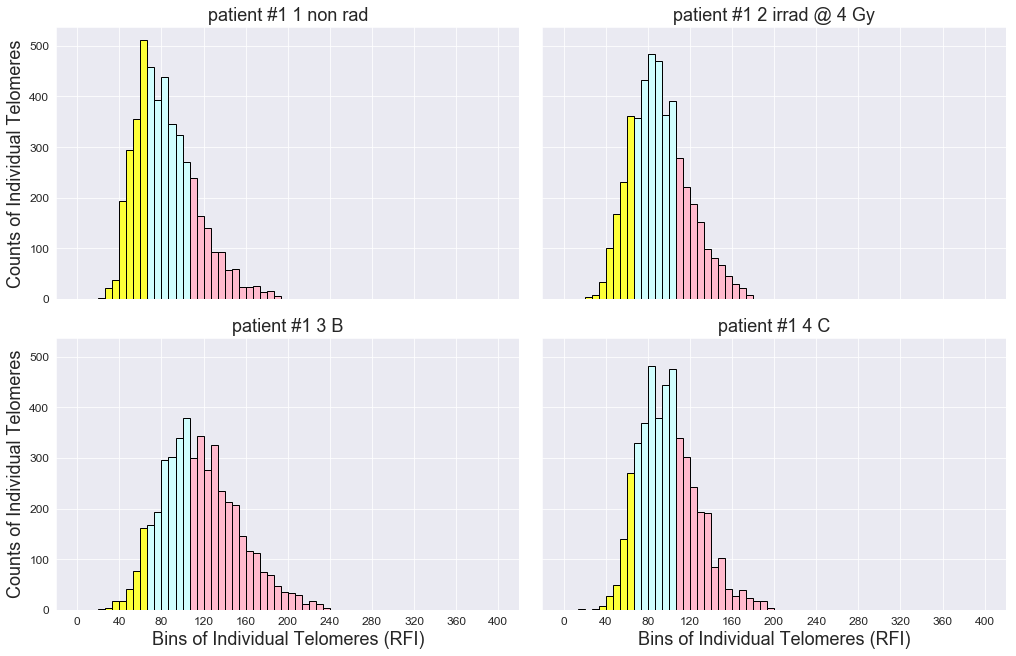

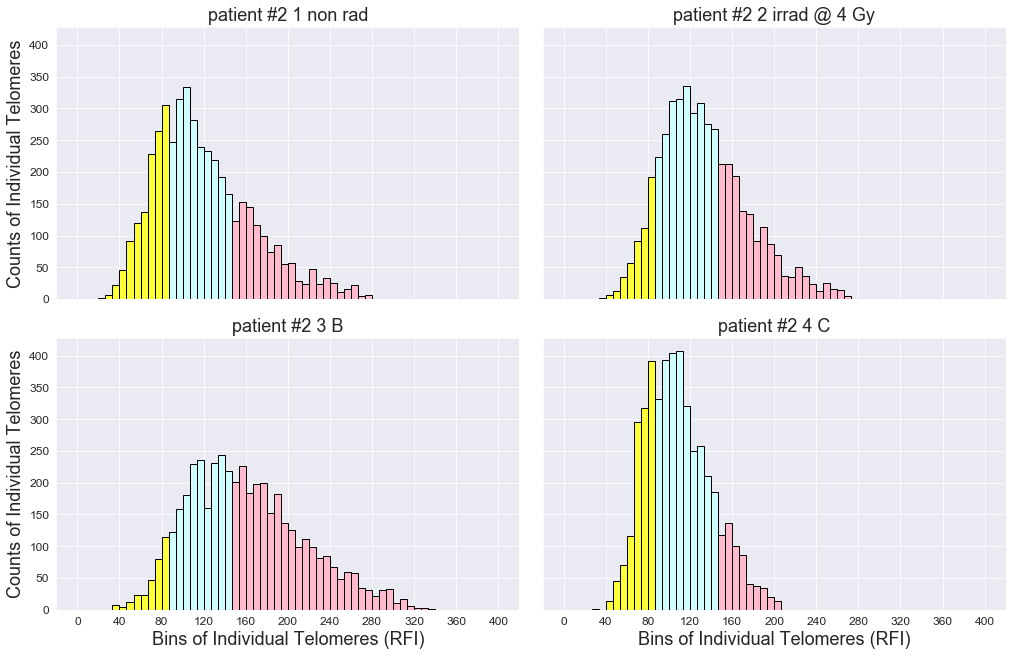

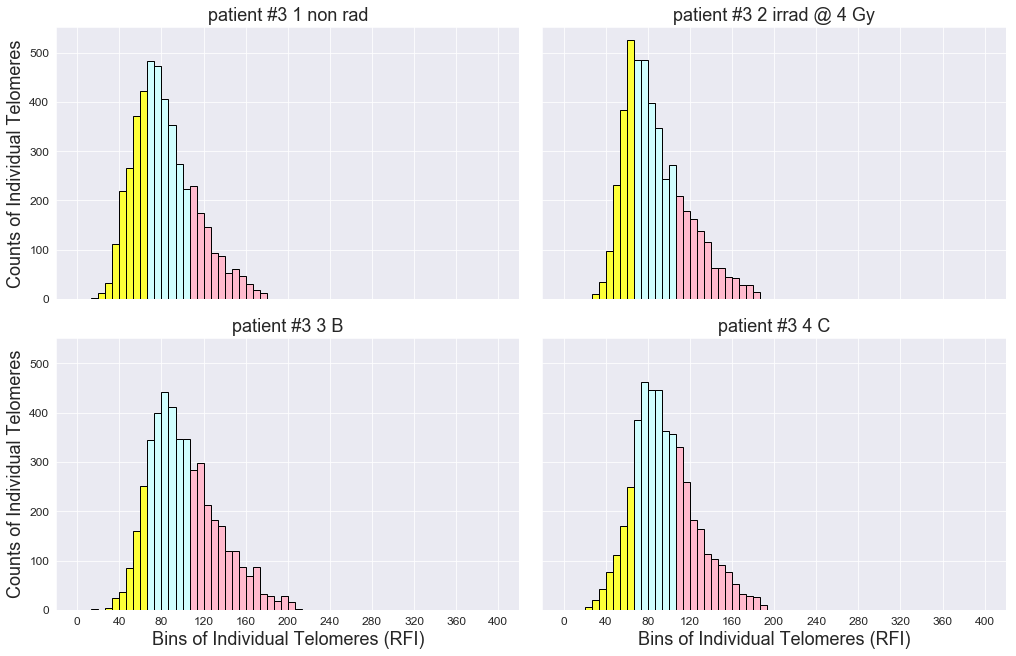

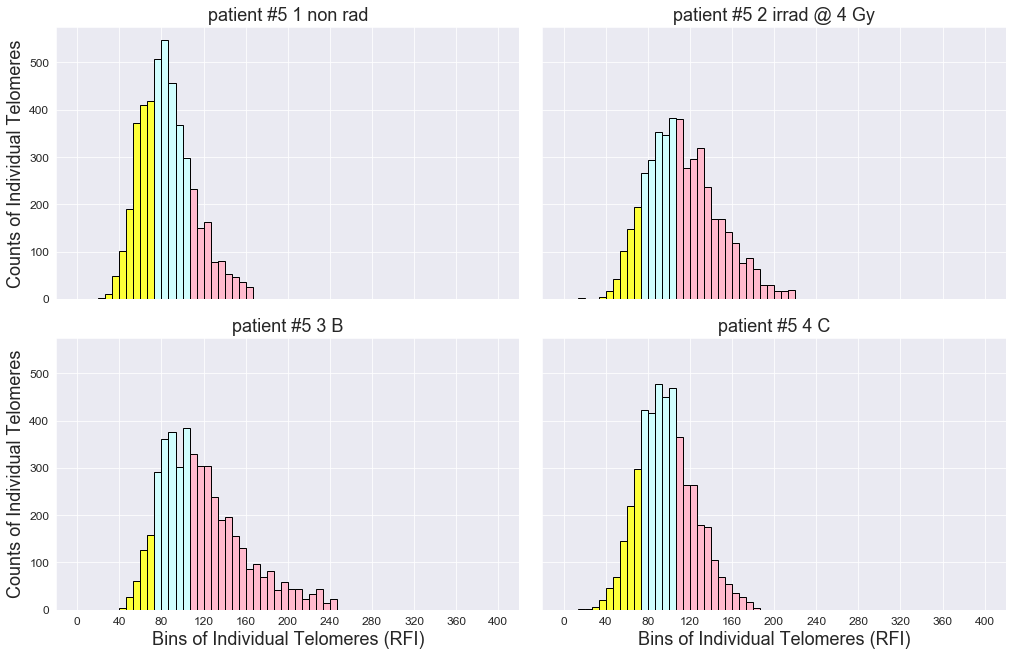

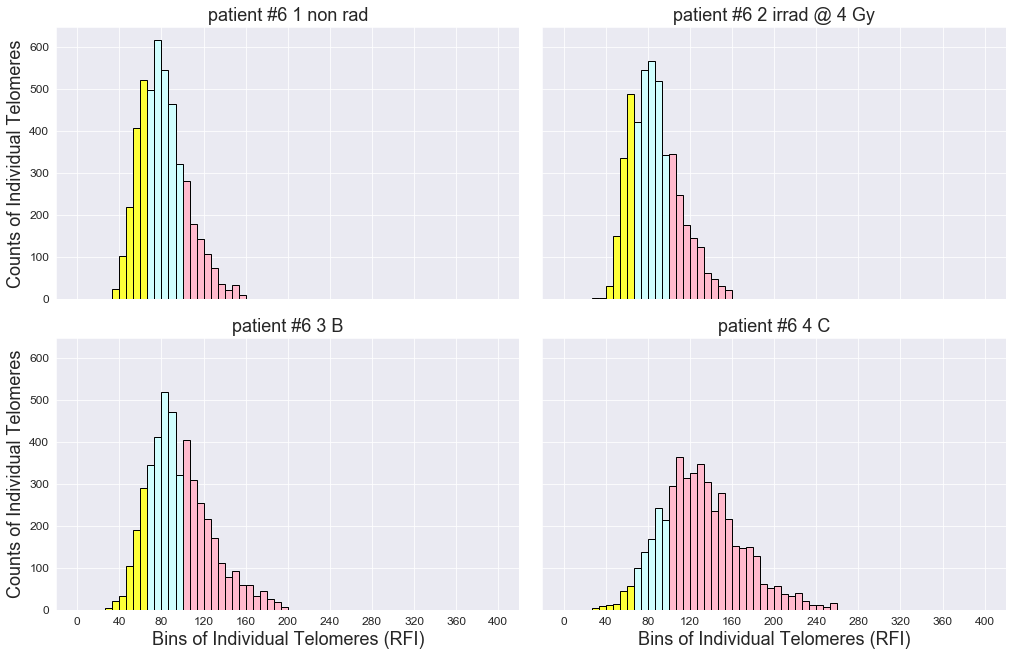

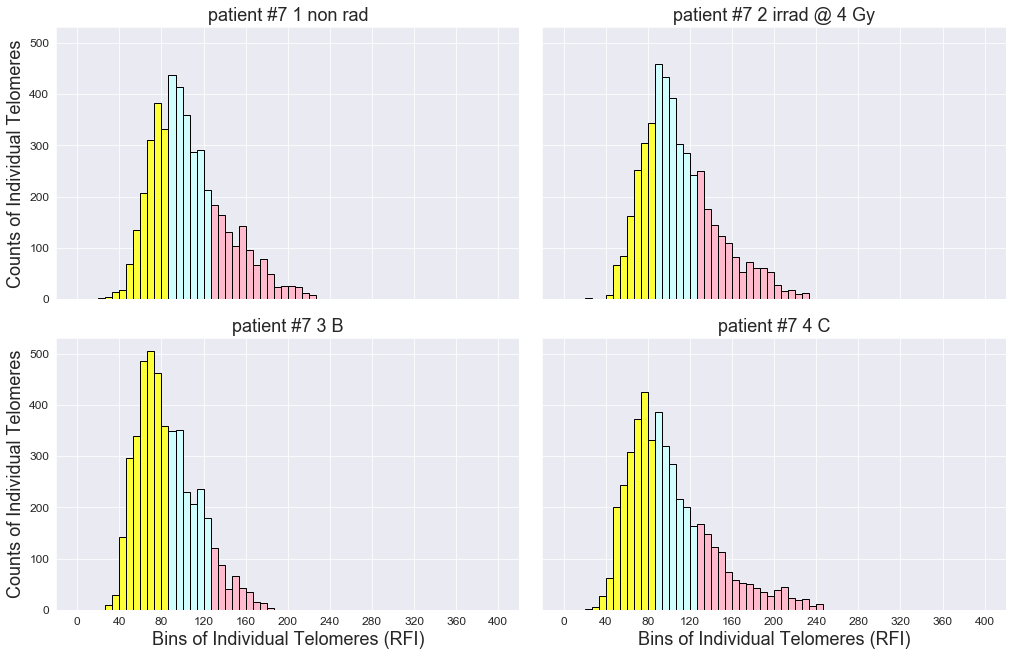

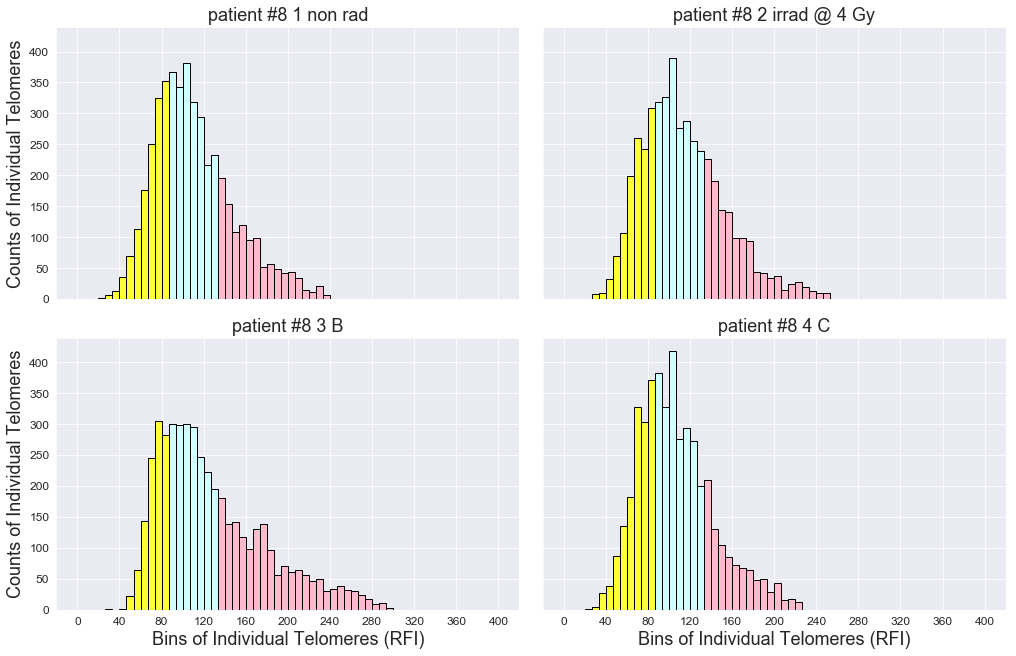

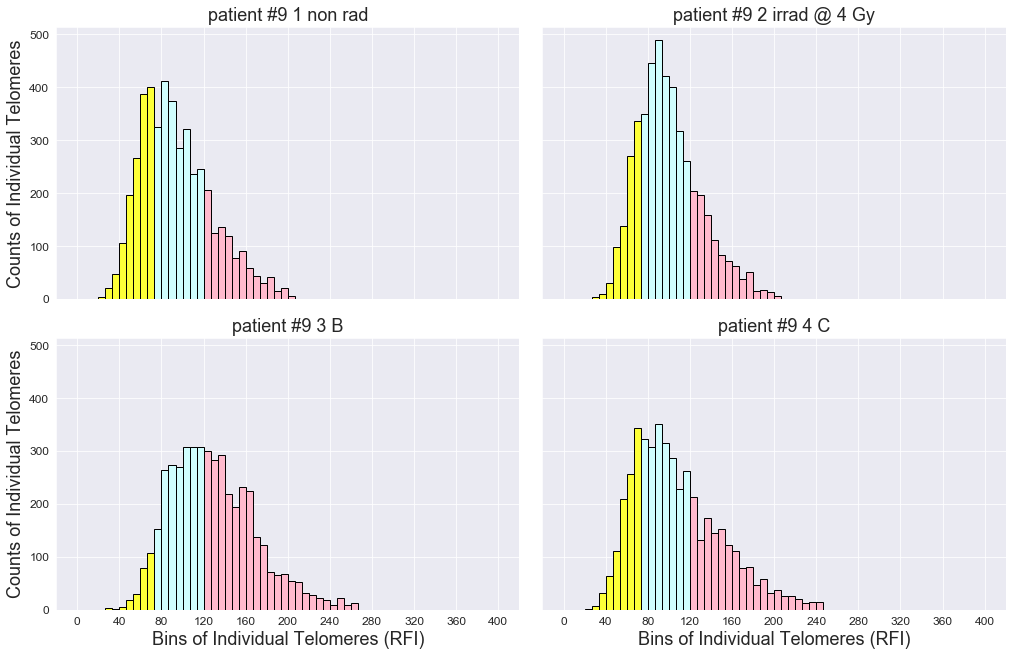

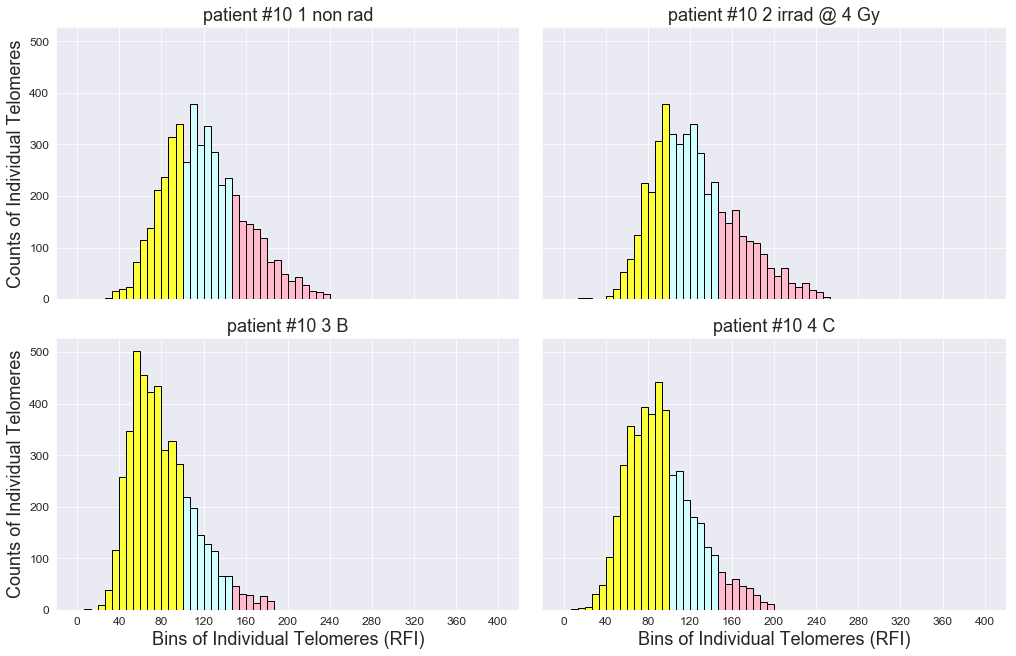

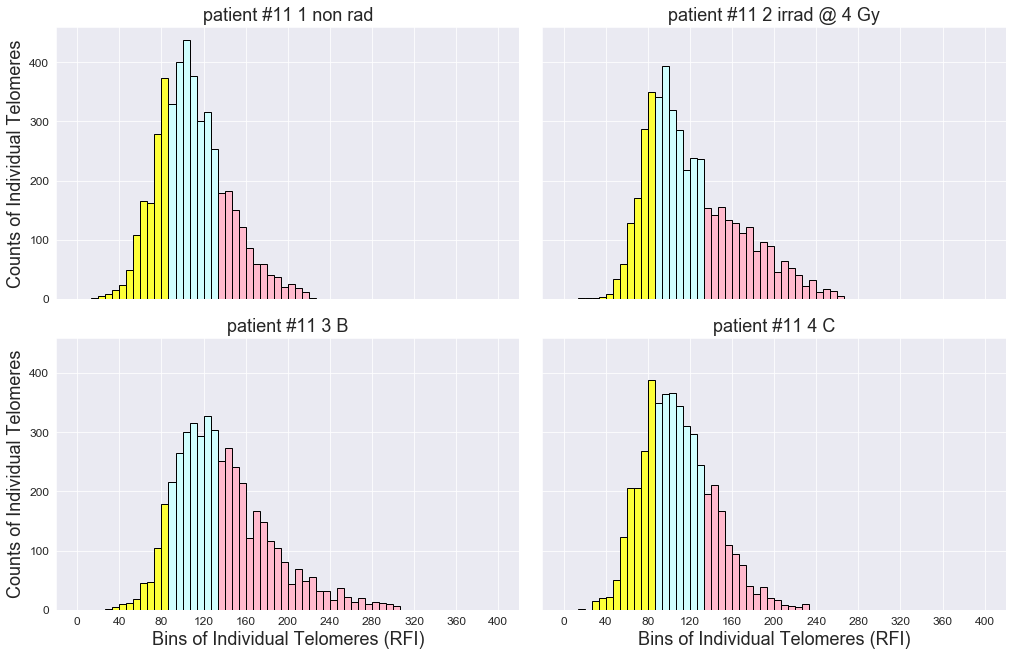

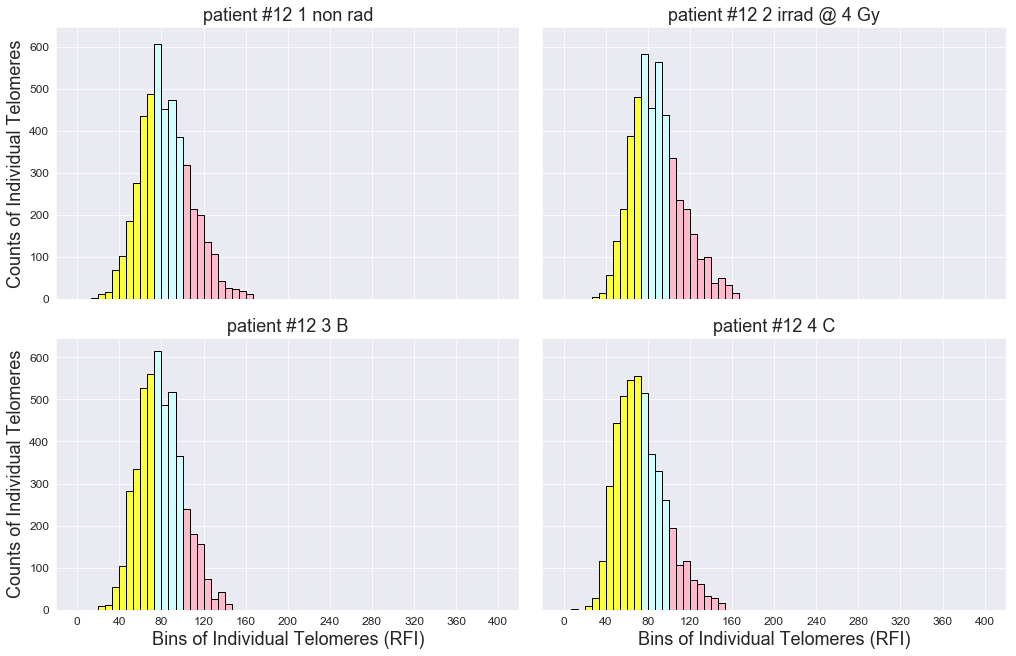

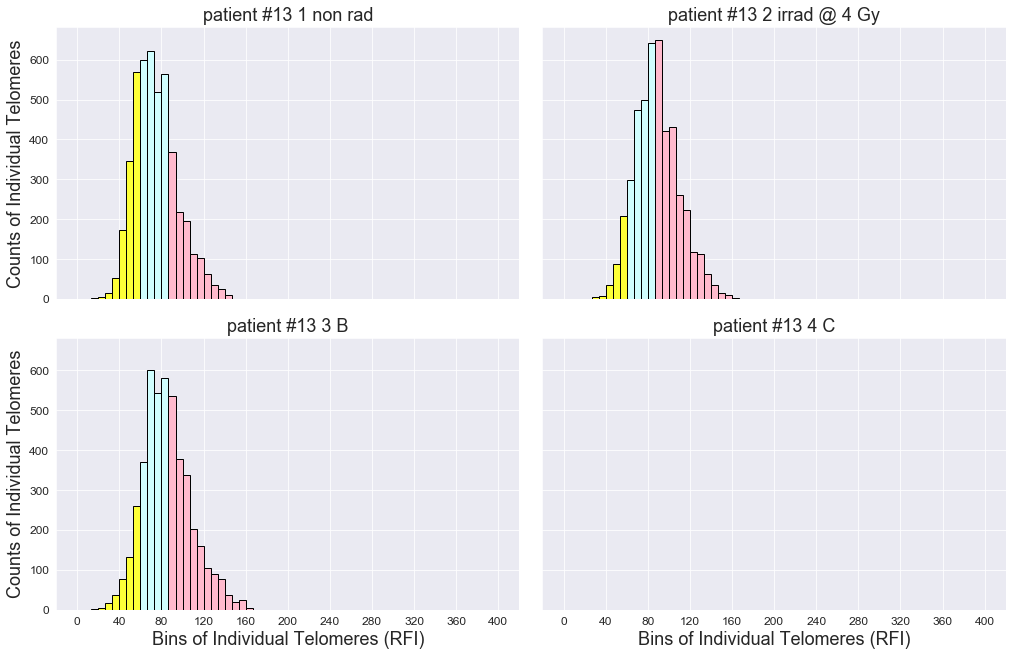

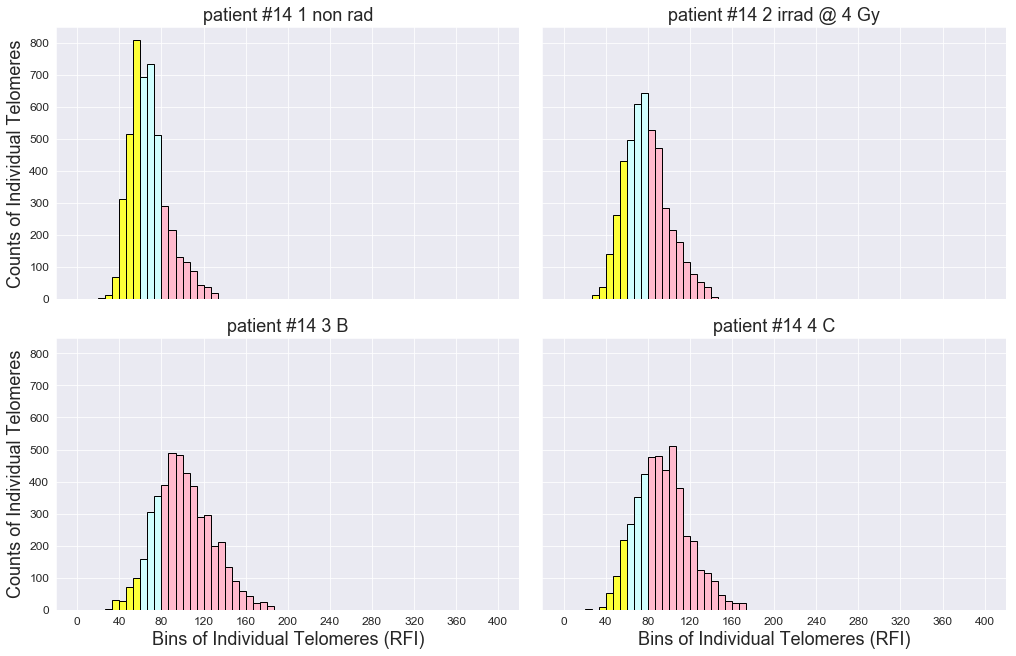

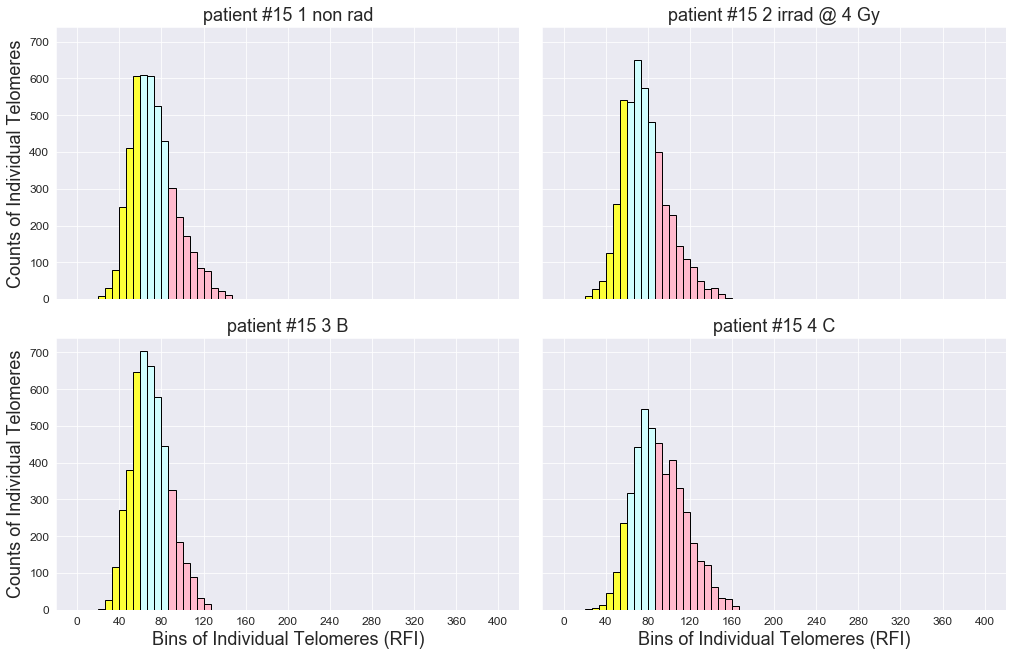

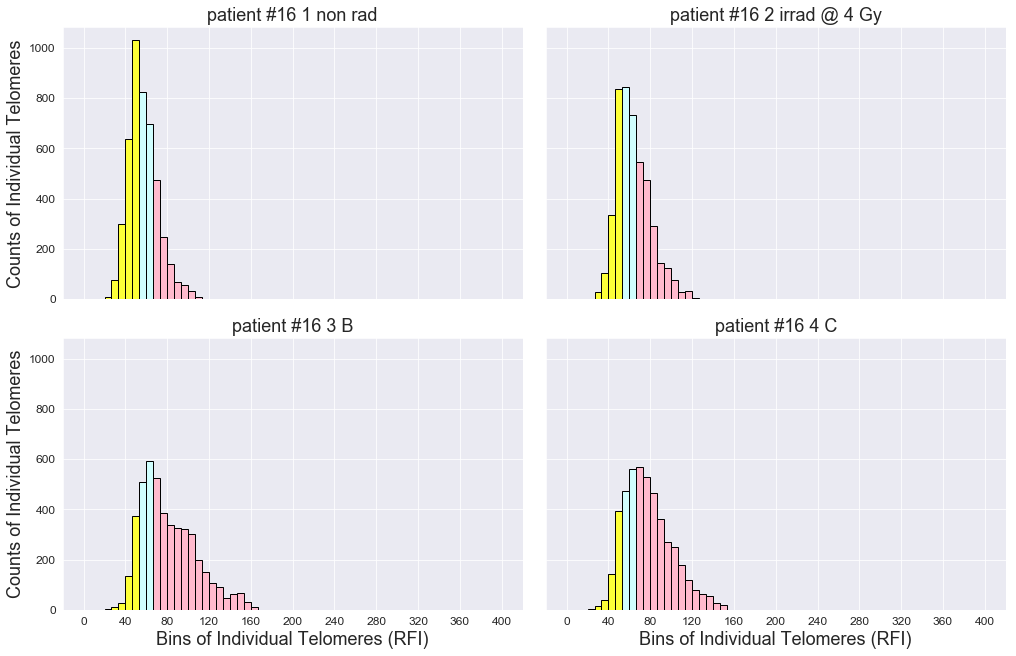

In [83]:
# graphing individual telomeres by individual per timepoint

patient_ids = list(all_patients_df['patient id'].unique())
trp.histogram_plot_groups(x='individual telomeres', data=exploded_telos_all_patients_df, 
                               groupby='patient id', iterable=patient_ids)

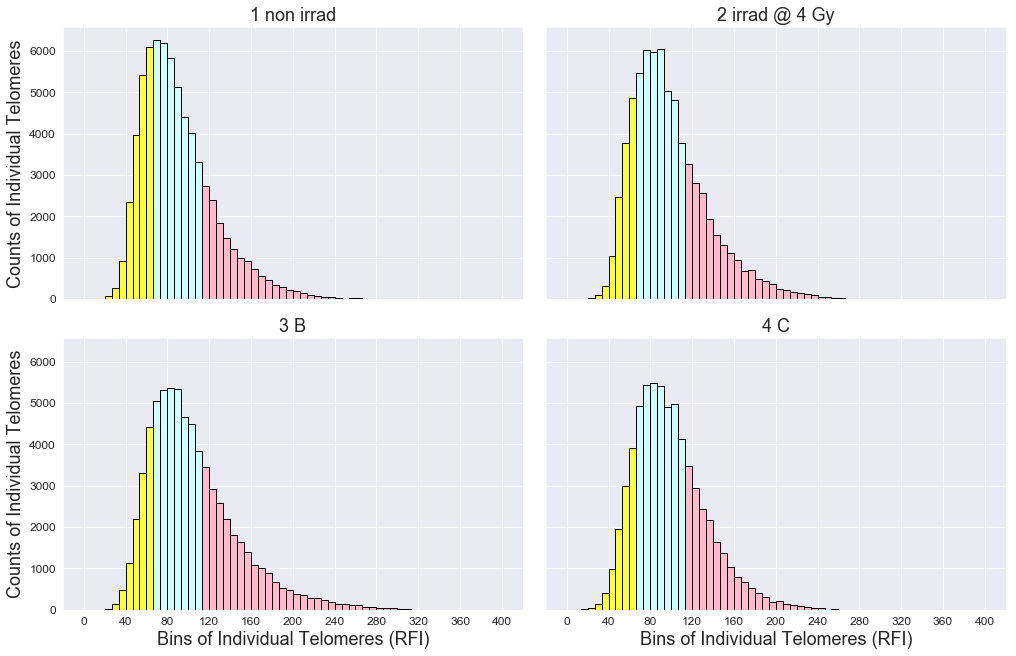

In [81]:
# graphing individual telomeres by timepoint

time_points = list(all_patients_df['timepoint'].unique())
trp.histogram_plot_groups(x='individual telomeres', data=exploded_telos_all_patients_df, 
                               groupby='timepoint', iterable=time_points)

### Feature Engineering Short/Long Individual Telomeres

In [7]:
melted_all_patients_df = pd.melt(
    all_patients_df,
    id_vars = [col for col in all_patients_df.columns if col != 'Q1' and col != 'Q2-3' and col != 'Q4'],
    var_name='relative Q',
    value_name='Q freq counts')

melted_all_patients_df['Q freq counts'] = melted_all_patients_df['Q freq counts'].astype('float64')
melted_all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,relative Q,Q freq counts
0,1,1 non irrad,"[106.6424579997861, 57.016759722657916, 60.184...",chr data,IT WORKS PEGGY <333,84.796738,Q1,1195.0
1,1,2 irrad @ 4 Gy,"[96.0837987918865, 55.960893801867954, 136.206...",chr data,IT WORKS PEGGY <333,90.975987,Q1,724.0
2,1,3 B,"[98.19553063346642, 148.87709483138457, 115.08...",chr data,IT WORKS PEGGY <333,116.780229,Q1,231.0
3,1,4 C,"[59.12849156423784, 98.19553063346642, 116.145...",chr data,IT WORKS PEGGY <333,99.346663,Q1,372.0


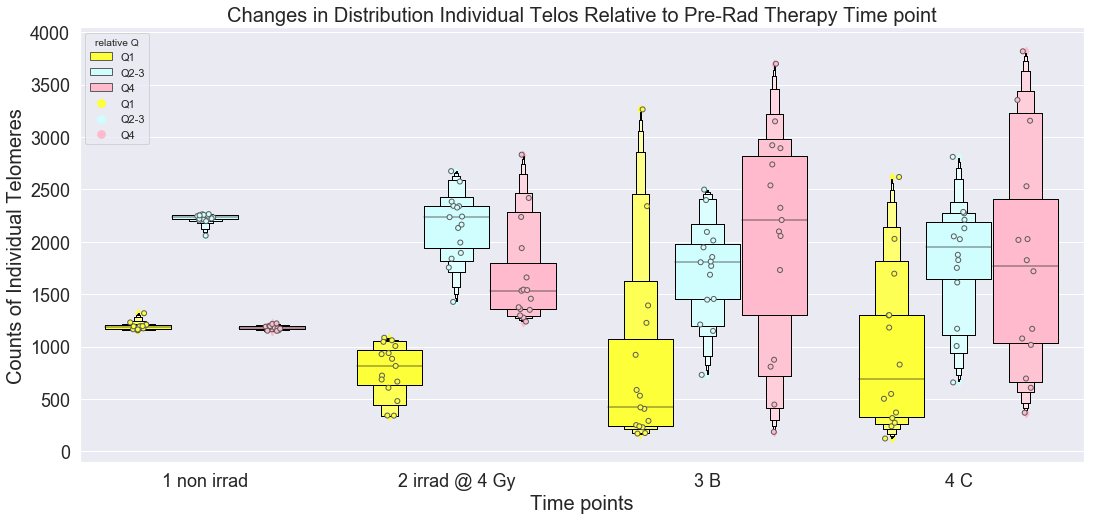

In [16]:
ax = sns.set(font_scale=1)
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=2, saturation=5, color="black", )
ax = sns.stripplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=1, color="black", dodge=True, )


ax=fig.gca()
ax.set_title('Changes in Distribution Individual Telos Relative to Pre-Rad Therapy Time point', fontsize=20)
ax.set_xlabel('Time points', fontsize=20)
ax.set_ylabel('Counts of Individual Telomeres', fontsize=20)
ax.tick_params(labelsize=18)

plt.savefig('../graphs/telomere length/examining changes in individual telomere lengths per quartile.png', dpi=400)

# Analyzing Telomere Length Data from qPCR (Aidan/Lynn)
---

In [51]:
%autoreload

In [125]:
all_qPCR_df = pd.read_csv('../qPCR telo data/all_qPCR_df.csv')

In [126]:
all_qPCR_df.head()

,patient id,timepoint,telo means qPCR,SEM
0,1,1 non irrad,2.182028,0.083233
1,1,3 B,1.964348,0.051942
2,1,4 C,1.749799,0.068195
3,2,1 non irrad,1.669445,0.034776
4,2,3 B,1.780092,0.066181


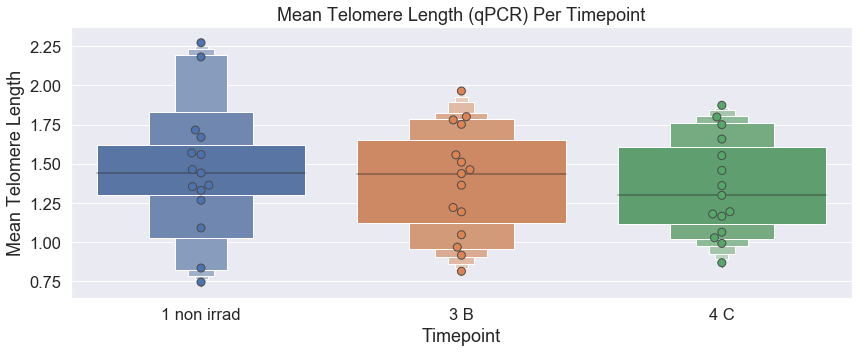

In [28]:
fig = plt.figure(figsize=(14,5))
ax = sns.set(font_scale = 1.5)

ax= sns.boxenplot(x='timepoint', y='telo means qPCR', data=all_qPCR_df,
             linewidth=1)
ax= sns.swarmplot(x='timepoint', y='telo means qPCR', data=all_qPCR_df,
             linewidth=1, size=8)

ax.set_title("Mean Telomere Length (qPCR) Per Timepoint") 
ax.set_ylabel('Mean Telomere Length')
ax.set_xlabel('Timepoint')
plt.savefig('../graphs/telomere length/all patient telomere length means qPCR.png', dpi=400)

## Correlations and Linear Regressions 

In [144]:
pivot_qPCR_df = all_qPCR_df.pivot(index='patient id', columns='timepoint', values='telo means qPCR')
pivot_qPCR_df['constant'] = 1
display(
pivot_qPCR_df.head(4),
pivot_qPCR_df.corr())

timepoint,1 non irrad,3 B,4 C,constant
patient id,,,,
1,2.182028,1.964348,1.749799,1
2,1.669445,1.780092,1.657974,1
3,1.354539,1.557154,1.552189,1
5,1.441672,1.751774,1.798568,1


timepoint,1 non irrad,3 B,4 C,constant
timepoint,,,,
1 non irrad,1.000000,0.765298,0.769699,NaN
3 B,0.765298,1.000000,0.880080,NaN
4 C,0.769699,0.880080,1.000000,NaN
constant,NaN,NaN,NaN,NaN


In [148]:
x_name = '1 non irrad'
y_name = '4 C'

x = pivot_qPCR_df[['1 non irrad']].values.reshape(-1, 1)
y = pivot_qPCR_df['4 C'].values.reshape(-1, 1)

regression = LinearRegression().fit(x, y)
print(f"Linear regression for {x_name} vs. {y_name}:\nR2 is {regression.score(x, y):.4f}")

Linear regression for 1 non irrad vs. 4 C:
R2 is 0.5924


In [146]:
x_name = '3 B', '1 non irrad'
y_name = '4 C'

x = pivot_qPCR_df[['3 B', '1 non irrad']].values.reshape(-1, 2)
y = pivot_qPCR_df['4 C'].values.reshape(-1, 1)

regression = LinearRegression().fit(x, y)
print(f"Linear regression for {x_name} vs. {y_name}:\nR2 is {regression.score(x, y):.4f}")

Linear regression for ('3 B', '1 non irrad') vs. 4 C:
R2 is 0.7969


In [56]:
target = pivot_qPCR_df['4 C']


linear_m = sm.OLS(endog=target, exog=pivot_qPCR_df[['1 non irrad', 'constant']], missing='drop')
results = linear_m.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    4 C   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     18.90
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000791
Time:                        10:43:42   Log-Likelihood:                 3.1384
No. Observations:                  15   AIC:                            -2.277
Df Residuals:                      13   BIC:                           -0.8606
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
1 non irrad     0.5885      0.135      4.347      

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [57]:
linear_m2 = sm.OLS(endog=target, exog=pivot_qPCR_df[['1 non irrad', '3 B', 'constant']], missing='drop')
results2 = linear_m2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    4 C   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     23.54
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           7.03e-05
Time:                        10:43:42   Log-Likelihood:                 8.3608
No. Observations:                  15   AIC:                            -10.72
Df Residuals:                      12   BIC:                            -8.598
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
1 non irrad     0.1775      0.155      1.148      

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


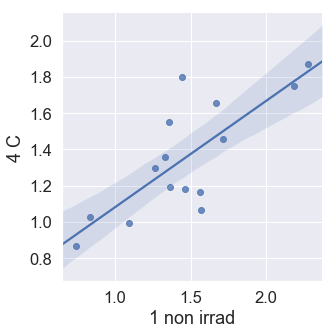

In [58]:
sns.lmplot(x='1 non irrad', y='4 C', data=pivot_qPCR_df, fit_reg=True)

## Statistics 

In [127]:
# conducting one-way repeated measures ANOVA for mean telomere length

df2 = all_qPCR_df

g_1 = df2[df2['timepoint'] == '1 non irrad']['telo means qPCR']
g_3 = df2[df2['timepoint'] == '3 B']['telo means qPCR']
g_4 = df2[df2['timepoint'] == '4 C']['telo means qPCR']

stats.f_oneway(g_1, g_3, g_4)

F_onewayResult(statistic=0.33940643369655527, pvalue=0.714128148014912)

# Analyzing Chromosome Aberration Data from dGH
---

In [225]:
all_chr_aberr_df = pd.read_csv('../compiled patient data csv files/all_chr_aberr_df.csv')
copy = all_chr_aberr_df.copy()

In [226]:
copy['sample notes'] = copy['sample notes'].astype('str')
copy['# inversions'] = copy['# inversions'].astype('int64')
copy['# terminal inversions'] = copy['# terminal inversions'].astype('int64')

In [6]:
# incase reloading modules is required
import importlib
%load_ext autoreload
%autoreload 

In [177]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion


# 1. general cleaner
# 2. make features (combine inversions, etc)
# 3. make target and merge to data
# i.e: 

# if 4C feature < irrad, = 0
# elif 4C feature == irrad, = 1
# elif 4C features > irrad, = 2

In [210]:
class general_chr_aberr_cleaner(BaseEstimator, TransformerMixin):
    def __init__(self, adjust_clonality=True, combine_alike_aberr=True, drop_what_timepoint='3 B'):
        self.adjust_clonality = adjust_clonality
        self.combine_alike_aberr = combine_alike_aberr
        self.drop_what_timepoint = drop_what_timepoint
        
    def fit(self, X, y=None):
        return self
    
    
    def enforce_column_types(self, X, y=None):
        copy = X
        copy['sample notes'] = copy['sample notes'].astype('str')
        
        num_cols = ['# inversions', '# terminal inversions', 'translocations reciprocal 1,2,3', 'translocations one-way 1,2,3']
        for col in num_cols:
            copy[col] = copy[col].astype('int64')
            
        return copy
    
    
    def adjust_clonality_counts(self, row):
        if row['sample notes'] == 'NaN' or row['sample notes'] == 'nan':
            pass
    
        if 'inv' in row['sample notes']:
            sample_notes = row['sample notes']
            clonal_inv = re.findall('[0-9] inv', sample_notes)

            if len(clonal_inv) > 0:
                row['# inversions'] = row['# inversions'] - len(clonal_inv)
                
            if 'term' in row['sample notes']:
                clonal_term_inv = re.findall('term inv', sample_notes)
                
                if len(clonal_term_inv) > 0:
                    row['# terminal inversions'] = row['# terminal inversions'] - len(clonal_term_inv)

        if 'trans' in row['sample notes']:
            sample_notes = row['sample notes']
            clonal_trans = re.findall('[0-9] trans', sample_notes)
            
            if len(clonal_trans) > 0:
                row['translocations reciprocal 1,2,3'] = row['translocations reciprocal 1,2,3'] - len(clonal_trans)

        return row

    
    def combine_chr_aberr(self, X, y=None):
        copy = X
        # combining satellite associations
        copy['# sat associations'] = (copy['# 2 chr sat. associations'] + copy['# 3 chr sat. associations'] +
                                      copy['# 4 chr sat. associations'] + copy['# 5+ chr sat. associations'])
        
        # combining terminal SCEs
        copy['# terminal SCEs'] = copy['# terminal SCEs cis-paint'] + copy['# terminal SCEs cis-dark']

        # combining translocations
        copy['# translocations'] = copy['translocations reciprocal 1,2,3'] + copy['translocations one-way 1,2,3']
        
        return copy
    
    
    def drop_columns(self, X, y=None):
        # dropping unneeded chr aberr types
        X = X.drop(columns=['# 2 chr sat. associations', '# 3 chr sat. associations', 
                            '# 4 chr sat. associations', '# 5+ chr sat. associations',
                            '# terminal SCEs cis-paint', '# terminal SCEs cis-dark',
                            'translocations reciprocal 1,2,3', 'translocations one-way 1,2,3',
                            'tricentrics', '# sub-telo SCEs',
                            'chr fragments', 'expected chr fragments'], axis=1)

        # dropping misc. notation columns
        X = X.drop(columns=['metaphase size', 'terminal inversion size', 'inversion size',
                            'inversion notes', 'terminal inversion notes',
                            'translocation intra notes', 'sample notes',
                            ], axis=1)
        
        return X
    
    
    def drop_timepoint(self, X, y=None):
        X = X[X['timepoint'] != self.drop_what_timepoint].copy()
        return X

    
    def transform(self, X, y=None):
        X = self.enforce_column_types(X)
        
        if self.adjust_clonality:
            X = X.apply(self.adjust_clonality_counts, axis=1)
            
        if self.combine_alike_aberr:
            X = self.combine_chr_aberr(X)
        
        if self.drop_what_timepoint:
            X = self.drop_timepoint(X)
        
        X = self.drop_columns(X)
        return X

In [211]:
class make_features(BaseEstimator, TransformerMixin):
    def __init__(self, combine_inversions=True):
        self.combine_inversions = combine_inversions
    
    
    def fit(self, X, y=None):
        return self
    
    
    def total_inversions(self, X, y=None):
        X['# total inversions'] = X['# inversions'] + X['# terminal inversions']
        return X
    
    
    def transform(self, X, y=None):
        if self.combine_inversions:
            X = self.total_inversions(X)
        return X

In [233]:
class make_target_merge(BaseEstimator, TransformerMixin):
    def __init__(self, target='# inversions', target_timepoint='4 C'):
        self.target = target
        self.timepoint = '4 C'
#         self.target_dataframe = None

    def fit(self, X, y=None):
        return self
    
    
    def groupby_melt_groupby_merge(self, X, y=None):
        # data is arranged as events (chr aberr) per chromosome per cell; first sum per cell
        X = X.groupby(['patient id', 'timepoint', 'cell number']).agg('sum').reset_index()
        X.drop(['chromosome'], axis=1, inplace=True)
        
        # melt data into tidy data format
        X = pd.melt(X, id_vars=['patient id', 'timepoint', 'cell number'], 
                       var_name='aberration type',
                       value_name='count per cell')

        X['count per cell'] = X['count per cell'].astype('int64')
        X['aberration type'] = X['aberration type'].astype('str')
        
        # groupby to grab means of chr aberr.. 
        
        # pull out target column & merge with long-form per cell data
        
        
        return X
        
    
#     def make_target(self, X, y=None):
#         target_df = X[X[self.target]]

    def transform(self, X, y=None):
        X = self.groupby_melt_groupby(X)
        return X

In [234]:
general_cleaner = Pipeline([('cleaner', general_chr_aberr_cleaner()),
                            ('make features', make_features(combine_inversions=False)),
                            ('make target merge', make_target_merge())
                           ])

In [241]:
chr_data = general_cleaner.fit_transform(all_chr_aberr_df)
chr_data[(chr_data['timepoint'] == '1 non irrad') & 
         (chr_data['aberration type'] == '# inversions') &
         (chr_data['patient id'] == 1)]

,patient id,timepoint,cell number,aberration type,count per cell
0,1,1 non irrad,1,# inversions,0
1,1,1 non irrad,2,# inversions,0
2,1,1 non irrad,3,# inversions,0
3,1,1 non irrad,4,# inversions,0
4,1,1 non irrad,5,# inversions,0
5,1,1 non irrad,6,# inversions,0
6,1,1 non irrad,7,# inversions,0
7,1,1 non irrad,8,# inversions,0
8,1,1 non irrad,9,# inversions,0
9,1,1 non irrad,10,# inversions,0


In [209]:
# chr_data.groupby(['patient id', 'timepoint', 'cell number']).agg('sum').reset_index()

In [136]:
target = chr_data[chr_data['timepoint'] == '4 C'][['patient id', 'timepoint', 'cell number', '# inversions']]

In [162]:
# chr_data.groupby(['patient id', 'timepoint']).agg('mean').reset_index()

In [141]:
# asd[asd[]]

In [220]:
copy = copy.apply(trp.adjust_inversions_clonality, axis=1)

In [227]:
# combining satellite associations
copy['# sat associations'] = (copy['# 2 chr sat. associations'] + copy['# 3 chr sat. associations'] +
                              copy['# 4 chr sat. associations'] + copy['# 5+ chr sat. associations'])

# combining terminal SCEs
copy['# terminal SCEs'] = copy['# terminal SCEs cis-paint'] + copy['# terminal SCEs cis-dark']

# combining translocations
copy['# translocations'] = copy['translocations reciprocal 1,2,3'] + copy['translocations one-way 1,2,3']

# dropping sat assoc / term SCE columns
copy = copy.drop(columns=['# 2 chr sat. associations', '# 3 chr sat. associations', 
                          '# 4 chr sat. associations', '# 5+ chr sat. associations',
                          '# terminal SCEs cis-paint', '# terminal SCEs cis-dark',
                          'translocations reciprocal 1,2,3', 'translocations one-way 1,2,3'])


copy = copy.drop(columns=['metaphase size', 
                          'inversion notes', 'terminal inversion notes',
                         'translocation intra notes', 'sample notes'])

cleaned_chr_aberr_df = copy
cleaned_chr_aberr_df.columns

Index(['patient id', 'timepoint', 'cell number', 'chromosome',
       'inversion size', '# inversions', 'terminal inversion size',
       '# terminal inversions', '# sub-telo SCEs',
       '# sister chromatid exchanges', 'dicentrics', 'tricentrics',
       'chr fragments', 'expected chr fragments', 'excess chr fragments',
       '# sat associations', '# terminal SCEs', '# translocations'],
      dtype='object')

In [232]:
cleaned_chr_aberr_df.head()

,patient id,timepoint,cell number,chromosome,inversion size,# inversions,terminal inversion size,# terminal inversions,# sub-telo SCEs,# sister chromatid exchanges,dicentrics,tricentrics,chr fragments,expected chr fragments,excess chr fragments,# sat associations,# terminal SCEs,# translocations
0,6,1 non irrad,1,1,NaN,0,NaN,0,2,0,0,0,0,0,0,0,0,0
1,6,1 non irrad,1,2,NaN,0,NaN,0,2,0,0,0,0,0,0,0,0,0
2,6,1 non irrad,1,3,NaN,0,NaN,0,0,1,0,0,0,0,0,0,0,0
3,6,1 non irrad,2,1,NaN,0,NaN,0,1,0,0,0,0,0,0,0,0,0
4,6,1 non irrad,2,2,NaN,0,NaN,0,1,0,0,0,0,0,0,0,0,0


In [146]:
melt_aberrations = pd.melt(cleaned_chr_aberr_df,
       id_vars=[
       'patient id', 'timepoint', 'chromosome', 
       'inversion size', 'terminal inversion size',  
       'chr fragments', 'expected chr fragments', 'excess chr fragments',
        ],
       var_name='aberration type',
       value_name='count per cell')

melt_aberrations['count per cell'] = melt_aberrations['count per cell'].astype('int64')
melt_aberrations['aberration type'] = melt_aberrations['aberration type'].astype('str')

In [147]:
melt_aberrations_chr_only = melt_aberrations[~melt_aberrations['aberration type'].isin(['# sub-telo SCEs', 'tricentrics',
                                                                                   'dicentrics', '# translocations',
                                                                                   '# sat associations'])]

In [231]:
# melt_aberrations_chr_only

## Visualizing Chromosome Rearrangements

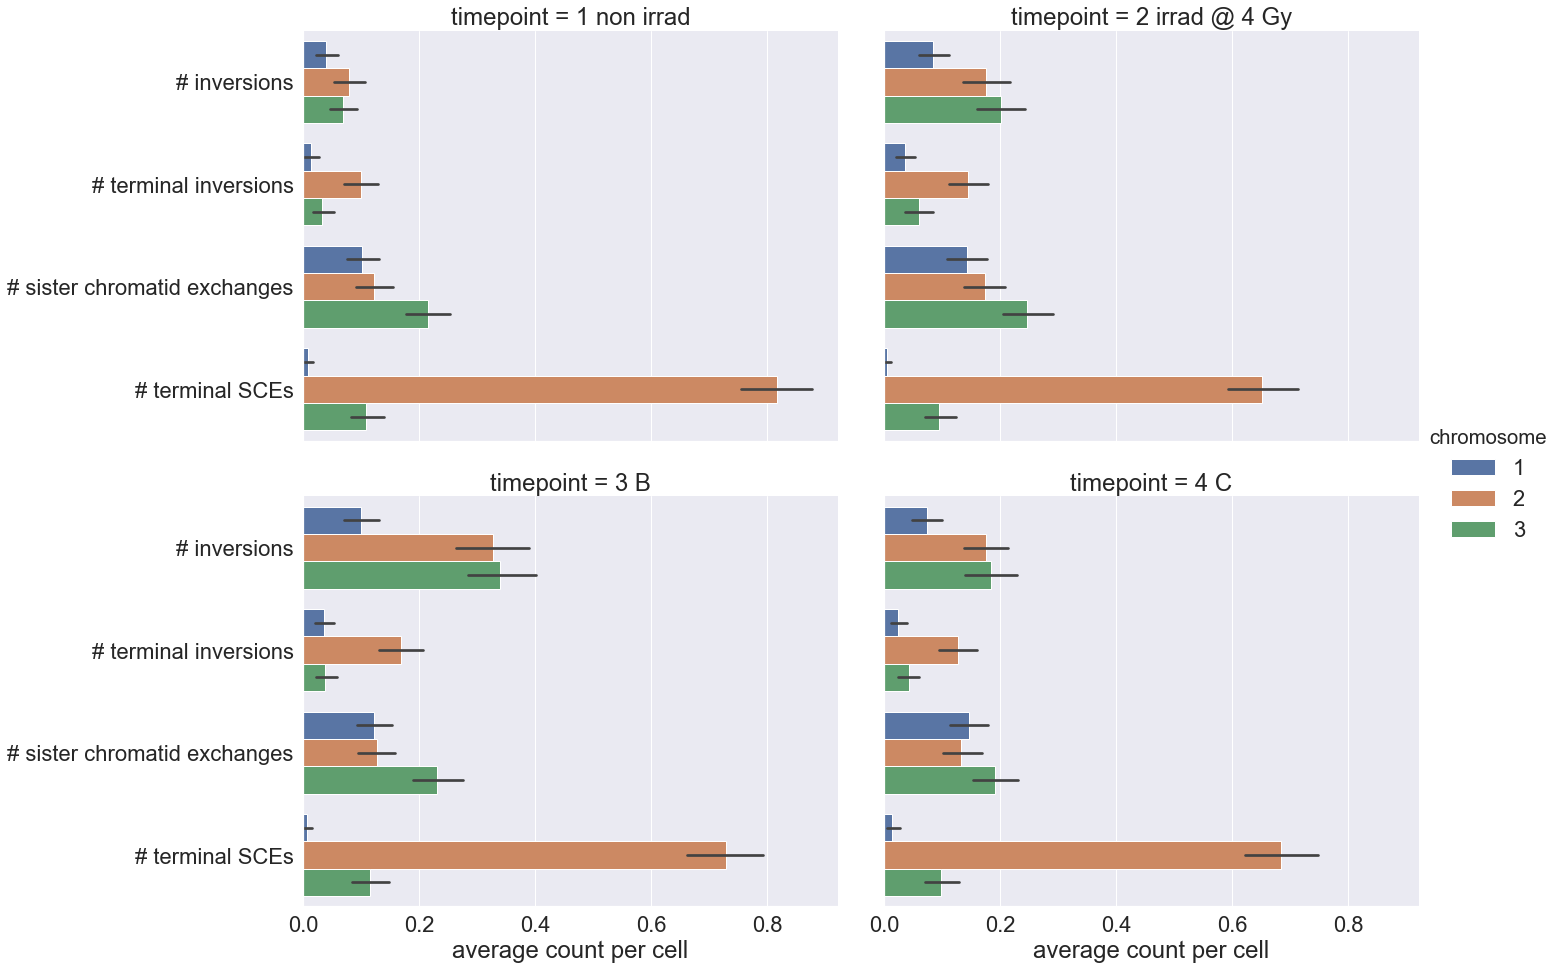

In [149]:
ax = sns.set(font_scale=2)
ax = sns.catplot(y='aberration type', x='count per cell', hue='chromosome', 
                 col='timepoint', col_wrap=2, 
                 data=melt_aberrations_chr_only, kind='bar', height=7, aspect=1.5, orient="h",)

ax.set_ylabels('')
ax.set_xlabels('average count per cell')

In [150]:
melt_aberrations_less = melt_aberrations[~melt_aberrations['aberration type'].isin(['# sub-telo SCEs', 'tricentrics'])]

In [152]:
melt_aberrations_less.head()

,patient id,timepoint,chromosome,inversion size,terminal inversion size,chr fragments,expected chr fragments,excess chr fragments,aberration type,count per cell
0,6,1 non irrad,1,NaN,NaN,0,0,0,# inversions,0
1,6,1 non irrad,2,NaN,NaN,0,0,0,# inversions,0
2,6,1 non irrad,3,NaN,NaN,0,0,0,# inversions,0
3,6,1 non irrad,1,NaN,NaN,0,0,0,# inversions,0
4,6,1 non irrad,2,NaN,NaN,0,0,0,# inversions,0


In [153]:
group_melt_aberrations = melt_aberrations_less.groupby(['patient id', 'timepoint', 'aberration type'], as_index=False).agg('mean')
group_melt_aberrations.rename(columns={'count per cell': 'average count per cell'}, inplace=True)
group_melt_aberrations.head(4)

,patient id,timepoint,aberration type,chromosome,chr fragments,expected chr fragments,excess chr fragments,average count per cell
0,1,1 non irrad,# inversions,2.0,0.0,0.0,0.0,0.022222
1,1,1 non irrad,# sat associations,2.0,0.0,0.0,0.0,0.044444
2,1,1 non irrad,# sister chromatid exchanges,2.0,0.0,0.0,0.0,0.211111
3,1,1 non irrad,# terminal SCEs,2.0,0.0,0.0,0.0,0.188889


In [16]:
# group_melt_aberrations.groupby(['timepoint', 'aberration type']).agg('mean')

In [67]:
partial_group_melt_aberrations = (group_melt_aberrations[group_melt_aberrations['aberration type']
                                                         .isin(['# inversions', '# sister chromatid exchanges',
                                                                '# translocations', 'dicentrics',
                                                                ])])

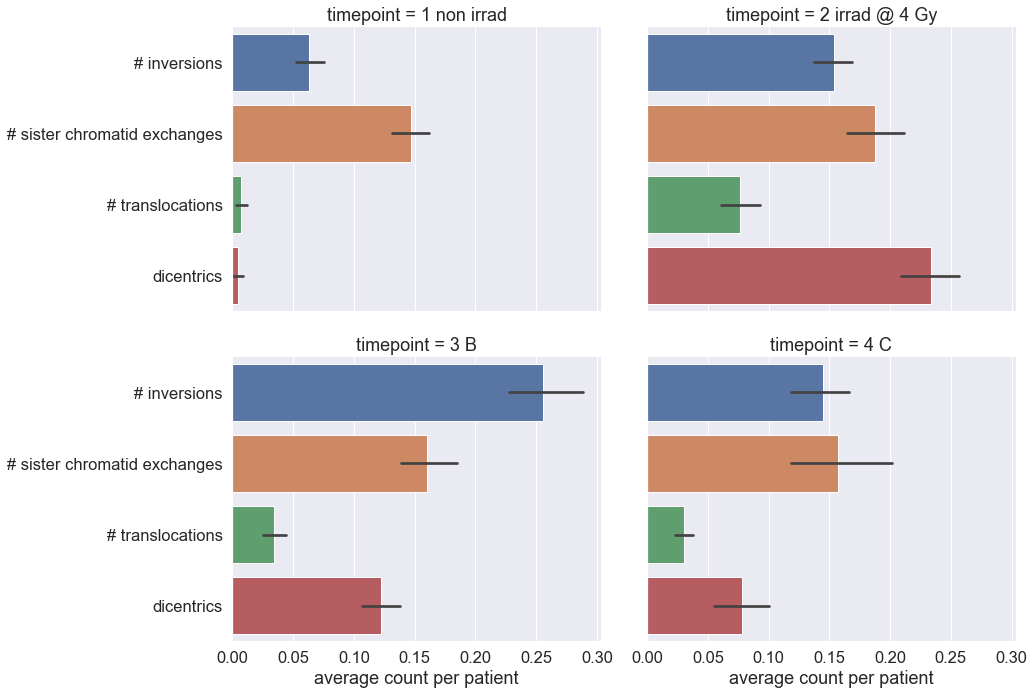

In [68]:
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.set(font_scale=1.5)
ax = sns.catplot(y='aberration type', x='average count per cell',
                 col='timepoint', col_wrap=2,  
                 data=partial_group_melt_aberrations, kind='bar', height=5, aspect=1.5, orient="h",)

ax.set_ylabels('')
ax.set_xlabels('average count per patient')

ax.savefig('../graphs/chromosome aberr/all patients rearrangements.png', dpi=400)

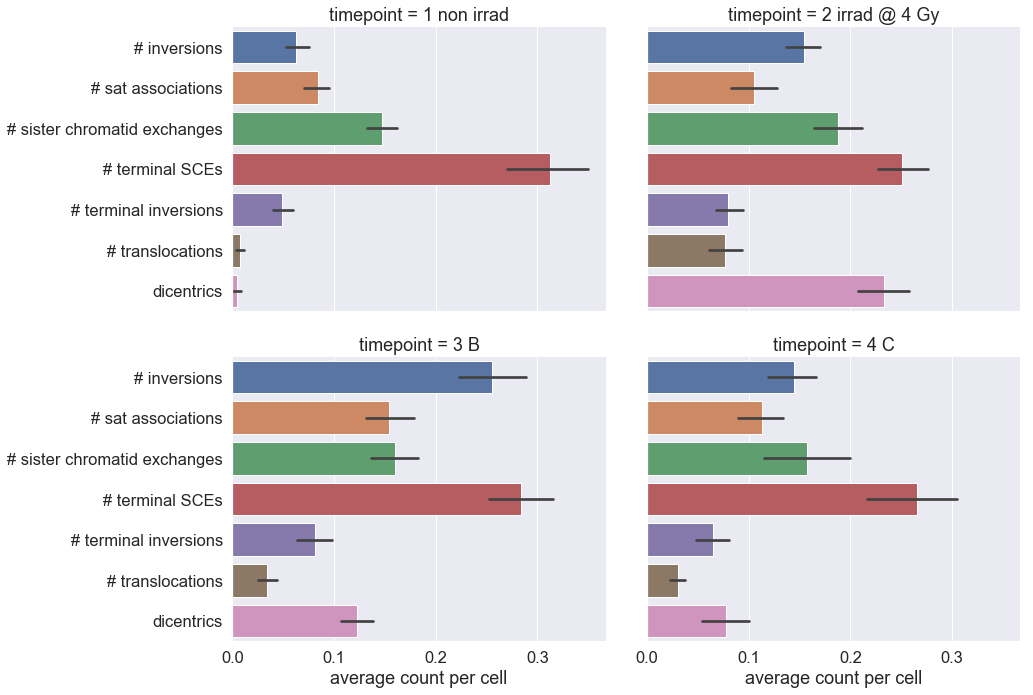

In [69]:
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.set(font_scale=1.5)
ax = sns.catplot(y='aberration type', x='average count per cell',
                 col='timepoint', col_wrap=2,  
                 data=group_melt_aberrations, kind='bar', height=5, aspect=1.5, orient="h",)

ax.set_ylabels('')
ax.set_xlabels('average count per cell')

ax.savefig('../graphs/chromosome aberr/all patients rearrangements.png', dpi=400)

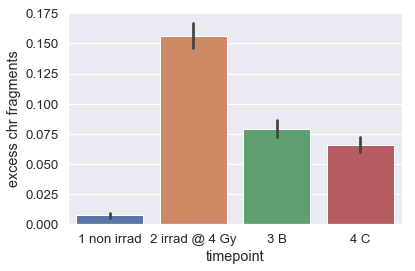

In [70]:
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.set(font_scale=1.2)
ax = sns.catplot(x='timepoint', y='excess chr fragments',
#                  col='timepoint', col_wrap=2,  
                 data=group_melt_aberrations, kind='bar', height=4, aspect=1.5, orient="v",)
ax.savefig('../graphs/chromosome aberr/all patients chr fragments.png', dpi=400)

In [71]:
# we'll perform a groupby action on this dataframe to yield chromosome rearrangements as columns 
# with values as the average count per cell

cleaned_chr_aberr_df.head(3)

,patient id,timepoint,chromosome,inversion size,# inversions,terminal inversion size,# terminal inversions,# sub-telo SCEs,# sister chromatid exchanges,dicentrics,tricentrics,chr fragments,expected chr fragments,excess chr fragments,# sat associations,# terminal SCEs,# translocations
0,6,1 non irrad,1,NaN,0,NaN,0,2,0,0,0,0,0,0,0,0,0
1,6,1 non irrad,2,NaN,0,NaN,0,2,0,0,0,0,0,0,0,0,0
2,6,1 non irrad,3,NaN,0,NaN,0,0,1,0,0,0,0,0,0,0,0


## Statistics Chromosome Rearrangements

In [72]:
# grouping by patient id/timepoint, retaining aberrations as columns

group_cleaned_chr_abber_df = cleaned_chr_aberr_df.groupby(['patient id', 'timepoint'], as_index=False).agg('mean')

In [73]:
group_cleaned_chr_abber_df.head(4)

,patient id,timepoint,chromosome,# inversions,# terminal inversions,# sub-telo SCEs,# sister chromatid exchanges,dicentrics,tricentrics,chr fragments,expected chr fragments,excess chr fragments,# sat associations,# terminal SCEs,# translocations
0,1,1 non irrad,2.0,0.022222,0.055556,0.455556,0.211111,0.000000,0.000000,0.000000,0.000000,0.000000,0.044444,0.188889,0.011111
1,1,2 irrad @ 4 Gy,2.0,0.155556,0.100000,0.366667,0.266667,0.133333,0.011111,0.266667,0.155556,0.122222,0.011111,0.222222,0.044444
2,1,3 B,2.0,0.266667,0.155556,0.600000,0.233333,0.122222,0.000000,0.266667,0.122222,0.144444,0.255556,0.266667,0.033333
3,1,4 C,2.0,0.100000,0.088889,0.488889,0.311111,0.022222,0.000000,0.111111,0.022222,0.088889,0.122222,0.255556,0.044444


In [95]:
# conducting one-way ANOVA for inversions 

df = group_cleaned_chr_abber_df

g_1 = df[df['timepoint'] == '1 non irrad']['# inversions']
g_2 = df[df['timepoint'] == '2 irrad @ 4 Gy']['# inversions']
g_3 = df[df['timepoint'] == '3 B']['# inversions']
g_4 = df[df['timepoint'] == '4 C']['# inversions']

stats.f_oneway(g_1, g_2, g_3, g_4)

F_onewayResult(statistic=43.74743166391486, pvalue=1.0708590724754498e-14)

In [75]:
columns = ['# inversions',
           '# terminal inversions', 
           '# sister chromatid exchanges', 'dicentrics', 
           'excess chr fragments',
           '# sat associations', '# terminal SCEs', '# translocations']

In [96]:
# conducting one-way ANOVA for chr rearrangements

df = group_cleaned_chr_abber_df

for col in columns:

    g_1 = df[df['timepoint'] == '1 non irrad'][col]
    g_2 = df[df['timepoint'] == '2 irrad @ 4 Gy'][col]
    g_3 = df[df['timepoint'] == '3 B'][col]
    g_4 = df[df['timepoint'] == '4 C'][col]
    
    print(col, stats.f_oneway(g_1, g_2, g_3, g_4))

# inversions F_onewayResult(statistic=43.74743166391486, pvalue=1.0708590724754498e-14)
# terminal inversions F_onewayResult(statistic=3.766612641815235, pvalue=0.015576216601208852)
# sister chromatid exchanges F_onewayResult(statistic=1.4034816364904619, pvalue=0.2513417487470231)
dicentrics F_onewayResult(statistic=95.85573971761835, pvalue=4.847676932355337e-22)
excess chr fragments F_onewayResult(statistic=42.210344574241404, pvalue=2.141492872084886e-14)
# sat associations F_onewayResult(statistic=6.93894286012744, pvalue=0.0004717019385939844)
# terminal SCEs F_onewayResult(statistic=1.9242228907033376, pvalue=0.13612368579249925)
# translocations F_onewayResult(statistic=27.907100199070992, pvalue=3.609164004245114e-11)


In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['# inversions'], df['timepoint'])
mc_results = mc.tukeyhsd()
print(mc_results)

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower   upper  reject
-------------------------------------------------------------
 1 non irrad   2 irrad @ 4 Gy  0.0956   0.0014  0.1898  True 
 1 non irrad        3 B        0.2311   0.1369  0.3253  True 
 1 non irrad        4 C        0.1067   0.0125  0.2009  True 
2 irrad @ 4 Gy      3 B        0.1356   0.0414  0.2298  True 
2 irrad @ 4 Gy      4 C        0.0111  -0.0831  0.1053 False 
     3 B            4 C       -0.1244  -0.2186 -0.0302  True 
-------------------------------------------------------------


In [165]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# from statsmodels.stats.multicomp import MultiComparison

# for col in columns:
#     mc = MultiComparison(df[col], df['timepoint'])
#     mc_results = mc.tukeyhsd()
#     print(col)
#     print(mc_results)

In [77]:
# pivoting out inversions for linear regression

pivot_group_invs = group_cleaned_chr_abber_df.pivot(index='patient id', columns='timepoint', values='# inversions')
pivot_group_invs['constant'] = 1

In [78]:
pivot_group_invs.drop([13], axis=0, inplace=True)

In [91]:
pivot_group_invs

timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,constant
patient id,,,,,
1,0.022222,0.155556,0.266667,0.100000,1
2,0.066667,0.200000,0.355556,0.200000,1
3,0.066667,0.133333,0.366667,0.211111,1
5,0.066667,0.200000,0.233333,0.177778,1
6,0.055556,0.066667,0.211111,0.122222,1
7,0.066667,0.166667,0.200000,0.133333,1
8,0.055556,0.133333,0.144444,0.133333,1
9,0.055556,0.144444,0.233333,0.133333,1
10,0.044444,0.155556,0.233333,0.144444,1


In [94]:
x_name2 = ['2 irrad @ 4 Gy', '1 non irrad']
x_name3 = ['3 B', '2 irrad @ 4 Gy', '1 non irrad']
y_name = '4 C'

for x_name in [x_name2, x_name3]:

    x = pivot_group_invs[x_name].values.reshape(-1, len(x_name))
    y = pivot_group_invs['4 C'].values.reshape(-1, 1)

    regression = LinearRegression().fit(x, y)
    print(f"Linear regression for {x_name} vs. {y_name}:\nR2 is {regression.score(x, y):.4f}")

Linear regression for ['2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.2534
Linear regression for ['3 B', '2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.7226


In [93]:
pivot_group_dicent = group_cleaned_chr_abber_df.pivot(index='patient id', columns='timepoint', values='dicentrics')

x_name2 = ['2 irrad @ 4 Gy', '1 non irrad']
x_name3 = ['3 B', '2 irrad @ 4 Gy', '1 non irrad']
y_name = '4 C'

for x in [x_name2, x_name3]:

    x = pivot_group_dicent[x].values.reshape(-1, len(x))
    y = pivot_group_dicent['4 C'].values.reshape(-1, 1)

    regression = LinearRegression().fit(x, y)
    print(f"Linear regression for {x_name} vs. {y_name}:\nR2 is {regression.score(x, y):.4f}")

Linear regression for ['3 B', '2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.1025
Linear regression for ['3 B', '2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.1873


In [85]:
pivot_group_t_inv = group_cleaned_chr_abber_df.pivot(index='patient id', columns='timepoint', values='# terminal inversions')

x_name2 = ['2 irrad @ 4 Gy', '1 non irrad']
x_name3 = ['3 B', '2 irrad @ 4 Gy', '1 non irrad']
y_name = '4 C'

for x in [x_name2, x_name3]:

    x = pivot_group_t_inv[x].values.reshape(-1, len(x))
    y = pivot_group_t_inv['4 C'].values.reshape(-1, 1)

    regression = LinearRegression().fit(x, y)
    print(f"Linear regression for {x_name} vs. {y_name}:\nR2 is {regression.score(x, y):.4f}")

Linear regression for ['3 B', '2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.0860
Linear regression for ['3 B', '2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.4514


In [86]:
pivot_group_frag = group_cleaned_chr_abber_df.pivot(index='patient id', columns='timepoint', values='excess chr fragments')

x_name2 = ['2 irrad @ 4 Gy', '1 non irrad']
x_name3 = ['3 B', '2 irrad @ 4 Gy', '1 non irrad']
y_name = '4 C'

for x in [x_name2, x_name3]:

    x = pivot_group_frag[x].values.reshape(-1, len(x))
    y = pivot_group_frag['4 C'].values.reshape(-1, 1)

    regression = LinearRegression().fit(x, y)
    print(f"Linear regression for {x_name} vs. {y_name}:\nR2 is {regression.score(x, y):.4f}")

Linear regression for ['3 B', '2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.1289
Linear regression for ['3 B', '2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.1982


In [87]:
pivot_group_trans = group_cleaned_chr_abber_df.pivot(index='patient id', columns='timepoint', values='# translocations')

x_name2 = ['2 irrad @ 4 Gy', '1 non irrad']
x_name3 = ['3 B', '2 irrad @ 4 Gy', '1 non irrad']
y_name = '4 C'

for x in [x_name2, x_name3]:

    x = pivot_group_trans[x].values.reshape(-1, len(x))
    y = pivot_group_trans['4 C'].values.reshape(-1, 1)

    regression = LinearRegression().fit(x, y)
    print(f"Linear regression for {x_name} vs. {y_name}:\nR2 is {regression.score(x, y):.4f}")

Linear regression for ['3 B', '2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.0027
Linear regression for ['3 B', '2 irrad @ 4 Gy', '1 non irrad'] vs. 4 C:
R2 is 0.0189


In [80]:
# sns.lmplot(x='1 non irrad', y='4 C', data=pivot_group_invs)

# Merge Telomere Length by TeloFISH & qPCR with Chromosome Aberrations from dGH

In [81]:
# group_aberrations

In [82]:
group_cleaned_chr_abber_df = group_cleaned_chr_abber_df[group_cleaned_chr_abber_df['timepoint'] != '2 irrad @ 4 Gy']

all_qPCR_chr_aberr = all_qPCR_df.merge(group_cleaned_chr_abber_df, on=['patient id', 'timepoint'])

In [83]:
all_qPCR_chr_aberr

,patient id,timepoint,telo means qPCR,SEM,chromosome,# inversions,# terminal inversions,# sub-telo SCEs,# sister chromatid exchanges,dicentrics,tricentrics,chr fragments,expected chr fragments,excess chr fragments,# sat associations,# terminal SCEs,# translocations
0,1,1 non irrad,2.182028,0.083233,2.0,0.022222,0.055556,0.455556,0.211111,0.000000,0.0,0.000000,0.000000,0.000000,0.044444,0.188889,0.011111
1,1,3 B,1.964348,0.051942,2.0,0.266667,0.155556,0.600000,0.233333,0.122222,0.0,0.266667,0.122222,0.144444,0.255556,0.266667,0.033333
2,1,4 C,1.749799,0.068195,2.0,0.100000,0.088889,0.488889,0.311111,0.022222,0.0,0.111111,0.022222,0.088889,0.122222,0.255556,0.044444
3,2,1 non irrad,1.669445,0.034776,2.0,0.066667,0.033333,0.388889,0.177778,0.000000,0.0,0.011111,0.000000,0.011111,0.111111,0.255556,0.011111
4,2,3 B,1.780092,0.066181,2.0,0.355556,0.100000,0.422222,0.233333,0.100000,0.0,0.155556,0.100000,0.055556,0.155556,0.333333,0.011111
5,2,4 C,1.657974,0.018744,2.0,0.200000,0.088889,0.466667,0.244444,0.155556,0.0,0.255556,0.155556,0.100000,0.122222,0.255556,0.011111
6,3,1 non irrad,1.354539,0.018292,2.0,0.066667,0.055556,0.466667,0.166667,0.011111,0.0,0.011111,0.011111,0.000000,0.122222,0.344444,0.022222
7,3,3 B,1.557154,0.051560,2.0,0.366667,0.033333,0.288889,0.166667,0.144444,0.0,0.233333,0.144444,0.088889,0.255556,0.233333,0.077778
8,3,4 C,1.552189,0.036392,2.0,0.211111,0.011111,0.411111,0.177778,0.100000,0.0,0.222222,0.100000,0.122222,0.166667,0.277778,0.044444
9,5,1 non irrad,1.441672,0.017782,2.0,0.066667,0.100000,0.533333,0.144444,0.022222,0.0,0.022222,0.022222,0.000000,0.100000,0.388889,0.000000


# Machine Learning

In [335]:
# predicting mean telomere length at three months post-therapy (4 C) using individual telomere lengths (FISH)

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, auc, accuracy_score, r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading/merging data for ML

In [85]:
# loading individual telo data
exploded_telos_all_patients_df = pd.read_csv('../compiled patient data csv files/exploded_telos_all_patients_df.csv')

# loading mean telomere length @ 4 C
all_patients_df = pd.read_csv('../compiled patient data csv files/all_patients_df.csv')

In [86]:
# cleaning & combing data; retaining features of interest
telo_data = trp.combine_data(exploded_telos=exploded_telos_all_patients_df, 
                             all_patients_df=all_patients_df)

telo_data.head()

,patient id,timepoint,individual telomeres,4 C telo means
0,1,1 non irrad,92.916201,99.346299
1,1,2 irrad @ 4 Gy,112.977654,99.346299
2,1,1 non irrad,65.463687,99.346299
3,1,2 irrad @ 4 Gy,104.530726,99.346299
4,1,1 non irrad,61.240223,99.346299


## Train/test split 

In [87]:
telo_test = telo_data.copy()

y = telo_test[['4 C telo means']]
X = telo_test.drop(['4 C telo means'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

train_set = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_set = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

## Initializing cleaning/model pipelines

In [88]:
clean_process_pipe = Pipeline([('features', trp.make_features(make_log_target=False)), 
                               ('dummies', trp.make_dummies(drop_first=True)),
                               ('cleaner', trp.clean_data(drop_patient_id=True))
                              ])

In [89]:
# initialize XGBoost model & pipeline
model = XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.2,
                     objective ='reg:squarederror', random_state=0)

xgb_pipe = Pipeline([('XGB', model)
                    ])

In [90]:
full_pipe = Pipeline([('clean_process', clean_process_pipe),
                      ('model', model)
                     ])

## Cleaning/modeling data with pipeline

In [91]:
train_clean = train_set.copy()
test_clean = test_set.copy()

train_clean = clean_process_pipe.fit_transform(train_clean)
test_clean = clean_process_pipe.fit_transform(test_clean)

## GridSearch for pipeline/model params

In [71]:
#XGBoost params for grid search
param_grid = {'XGB__max_depth': [3, 10, 15, 20],
              'XGB__learning_rate': [0.05, 0.1]}

X_train = train_clean[['individual telomeres', 'timepoint_1']].copy()
y_train = train_clean['4 C telo means'].copy()

folds = KFold(5, shuffle=True, random_state=0)
df_results, best_estimator = trp.grid_search(X_train, y_train, xgb_pipe, param_grid, 
                                          scoring='neg_mean_absolute_error', cv=folds, n_iter=2)
print(best_estimator)

## Evaluating model with cross validation; exploring if the model can use individual telos to predict mean telo length post-therapy (4 C)

In [92]:
# score model by cross validation, 5 folds, on X/y_train data 
# fit model on train data
# w/ model, predict y_test from X_test; score model by MAE/R2 - return model

model = trp.cv_score_fit_mae_test(train_set=train_clean, test_set=test_clean,
                                  pipe=xgb_pipe, model=model, cv=5)

MAE per CV fold: 
[3.18785095 3.12836879 3.20688015 3.22720893 3.21634131] 

MEAN of MAE all folds: 3.1933300265989137
STD of MAE all folds: 0.03495965322176145

MAE of predict_y_test & y_test: 3.1842247628114793
R2 between predict_y_test & y_test: 0.8869759776181293


In [97]:
telo_data_qualify = clean_process_pipe.set_params(cleaner__drop_patient_id=False).fit_transform(telo_data)

y_predict_list, y_true_list = trp.predict_mean_telos_4C_compare(telo_data=telo_data_qualify, 
                                                                train_set=train_clean, test_set=test_clean, model=model)

patient 1: ACTUAL telo mean @ 4 C: 99.35 --- PREDICTED telo mean @ 4 C: 99.22
patient 2: ACTUAL telo mean @ 4 C: 108.92 --- PREDICTED telo mean @ 4 C: 104.73
patient 3: ACTUAL telo mean @ 4 C: 95.67 --- PREDICTED telo mean @ 4 C: 96.57
patient 5: ACTUAL telo mean @ 4 C: 97.83 --- PREDICTED telo mean @ 4 C: 99.52
patient 6: ACTUAL telo mean @ 4 C: 130.12 --- PREDICTED telo mean @ 4 C: 123.37
patient 7: ACTUAL telo mean @ 4 C: 101.40 --- PREDICTED telo mean @ 4 C: 100.89
patient 8: ACTUAL telo mean @ 4 C: 106.65 --- PREDICTED telo mean @ 4 C: 104.10
patient 9: ACTUAL telo mean @ 4 C: 107.67 --- PREDICTED telo mean @ 4 C: 105.09
patient 10: ACTUAL telo mean @ 4 C: 93.35 --- PREDICTED telo mean @ 4 C: 97.60
patient 11: ACTUAL telo mean @ 4 C: 108.57 --- PREDICTED telo mean @ 4 C: 104.81
patient 12: ACTUAL telo mean @ 4 C: 73.99 --- PREDICTED telo mean @ 4 C: 80.43
patient 14: ACTUAL telo mean @ 4 C: 93.28 --- PREDICTED telo mean @ 4 C: 94.66
patient 15: ACTUAL telo mean @ 4 C: 90.68 --- PR

TypeError: set_xticks() got an unexpected keyword argument 'font_size'

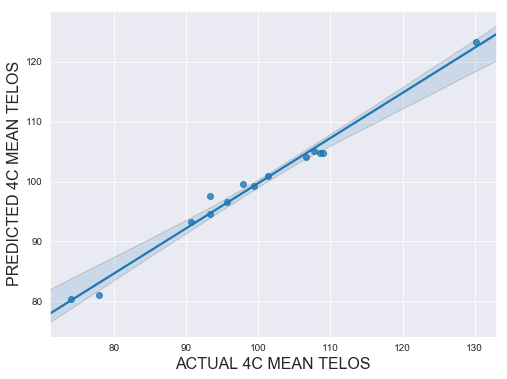

In [107]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x=y_true_list, y=y_predict_list)
ax.set_xlabel('ACTUAL 4C MEAN TELOS', fontsize=16)
ax.set_ylabel('PREDICTED 4C MEAN TELOS', fontsize=16)
ax.set_xticks(font_size=12)

## Testing if ML model can predict 4C mean telomere length using means

In [62]:
all_patients_4C = trp.combine_data(exploded_telos=exploded_telos_all_patients_df, 
                             all_patients_df=all_patients_df, for_predicting_means=True)

all_patients_4C.drop(['telo data', 'chr data', 'status', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)

In [112]:
telo_data_clean_process_pipe = clean_process_pipe.set_params(cleaner__drop_patient_id=False)

ML_mean_telos_pre = telo_data_clean_process_pipe.fit_transform(all_patients_4C)
ML_mean_telos_clean = ML_mean_telos_pre.copy()

ML_mean_telos_clean.rename(columns={'telo means':'individual telomeres'}, inplace=True)
ML_mean_telos_clean.drop(['patient id', '4 C telo means'], axis=1, inplace=True)
ML_mean_telos_clean.head()

,individual telomeres,timepoint_1
0,84.796483,0
1,90.975826,1
2,119.773675,0
3,133.199443,1
4,83.350928,0


In [118]:
pred_4C_telos = model.predict(ML_mean_telos_clean)
pred_4C_telos = pd.DataFrame({'y PREDICT 4C telos': pred_4C_telos})
alpha = pd.concat([ML_mean_telos_pre, pred_4C_telos], axis=1)[['patient id', '4 C telo means', 'y PREDICT 4C telos']]
alpha[['4 C telo means', 'y PREDICT 4C telos']].corr()

,4 C telo means,y PREDICT 4C telos
4 C telo means,1.000000,-0.005999
y PREDICT 4C telos,-0.005999,1.000000


In [293]:
#XGBoost params for grid search
XGB_param_grid = {'XGB__max_depth': [3, 10, 30],
                  'XGB__learning_rate': [0.05, 0.1],
                  'XGB__n_estimators': [100, 150],
                  'XGB__objective': ['reg:squarederror']}

In [294]:
folds = KFold(5, shuffle=False, random_state=0)

df_results, best_params = trp.grid_search(X_train, y_train, xgb_pipe, XGB_param_grid, 
                                          scoring='neg_mean_squared_error', cv=folds, n_iter=5)

print(best_params)
# display(df_results)

{'XGB__objective': 'reg:squarederror', 'XGB__n_estimators': 100, 'XGB__max_depth': 10, 'XGB__learning_rate': 0.05}


,param_XGB__objective,param_XGB__n_estimators,param_XGB__max_depth,param_XGB__learning_rate,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
0,reg:squarederror,100,10,0.05,-0.223302,0.253437,4.615499,0.287674,0.148087,0.013570
1,reg:squarederror,150,3,0.1,-0.279567,0.236112,3.131318,0.044828,0.052710,0.001297
2,reg:squarederror,150,10,0.1,-0.393356,0.305390,6.654636,0.060312,0.262033,0.003334
3,reg:squarederror,100,30,0.05,-0.458306,0.337250,10.742295,0.326858,0.604909,0.029954
4,reg:squarederror,150,30,0.05,-0.627091,0.421709,16.430735,0.357116,0.981375,0.027385


## comparing vs linear regression

In [355]:
l_model = LinearRegression().fit(X_train.values.reshape(-1, 2), y_train.values.reshape(-1, 1))
predict_y_test = l_model.predict(X_test.values.reshape(-1, 2))

In [356]:
print(mean_absolute_error(y_test, predict_y_test))

14.595003988585624


In [358]:
y_predict = []
y_true = []
X = ['timepoint', 'individual telomeres']
for patient in list(telo_data['patient id'].unique()):
    patient_data = telo_data[telo_data['patient id'] == patient]
    actual_4C = patient_data['4 C telo means'].mean()
    predict_4C = l_model.predict(patient_data[X].values.reshape(-1, 2))
    X2 = patient_data[X]
    print(f'patient {patient}: ACTUAL telo mean @ 4 C: {actual_4C:.2f} --- PREDICTED telo mean @ 4 C: {np.mean(predict_4C):.2f}')
    y_predict.append(np.mean(predict_4C))
    y_true.append(actual_4C)
print(r2_score(y_predict, y_true))
print(mean_absolute_error(y_predict, y_true))

patient 1: ACTUAL telo mean @ 4 C: 99.35 --- PREDICTED telo mean @ 4 C: 101.76
patient 2: ACTUAL telo mean @ 4 C: 108.92 --- PREDICTED telo mean @ 4 C: 102.37
patient 3: ACTUAL telo mean @ 4 C: 95.67 --- PREDICTED telo mean @ 4 C: 101.72
patient 5: ACTUAL telo mean @ 4 C: 97.83 --- PREDICTED telo mean @ 4 C: 101.94
patient 6: ACTUAL telo mean @ 4 C: 130.12 --- PREDICTED telo mean @ 4 C: 101.70
patient 7: ACTUAL telo mean @ 4 C: 101.40 --- PREDICTED telo mean @ 4 C: 102.08
patient 8: ACTUAL telo mean @ 4 C: 106.65 --- PREDICTED telo mean @ 4 C: 102.14
patient 9: ACTUAL telo mean @ 4 C: 107.68 --- PREDICTED telo mean @ 4 C: 101.91
patient 10: ACTUAL telo mean @ 4 C: 93.35 --- PREDICTED telo mean @ 4 C: 102.31
patient 11: ACTUAL telo mean @ 4 C: 108.57 --- PREDICTED telo mean @ 4 C: 102.20
patient 12: ACTUAL telo mean @ 4 C: 73.99 --- PREDICTED telo mean @ 4 C: 101.74
patient 14: ACTUAL telo mean @ 4 C: 93.28 --- PREDICTED telo mean @ 4 C: 101.53
patient 15: ACTUAL telo mean @ 4 C: 90.68 

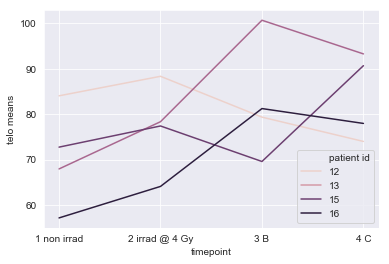

In [396]:
sns.lineplot(x='timepoint', y='telo means', hue='patient id', data=all_patients_df[all_patients_df['patient id'].isin([12, 14, 15, 16])])

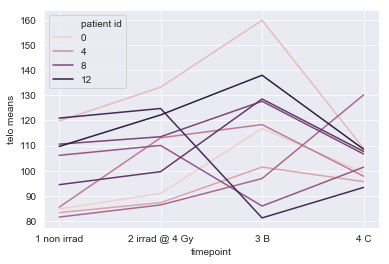

In [393]:
sns.lineplot(x='timepoint', y='telo means', hue='patient id', data=all_patients_df[~all_patients_df['patient id'].isin([12, 13, 14, 15, 16])])

In [132]:
# train_clean

In [137]:
training_MAE = []
test_MAE = []
max_depth_XGB = [3, 4, 5, 10, 15, 20, 25]

X = train_clean[['timepoint_1', 'individual telomeres']]
y = train_clean['4 C telo means']

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, random_state=0)

X_test = test_clean[['timepoint_1', 'individual telomeres']]
y_test = test_clean['4 C telo means']

for param in max_depth_XGB:
    model = XGBRegressor(max_depth=param, learning_rate=0.1, n_estimators=100, objective='reg:squarederror')
    model.fit(X_train, y_train)
    
    predict_y_val = model.predict(X_val)
    training_MAE.append(mean_absolute_error(predict_y_val, y_val))
    
    predict_y_test = model.predict(X_test)
    test_MAE.append(mean_absolute_error(predict_y_test, y_test))

In [138]:
viz_traintest_MAE = pd.DataFrame({'training_MAE': training_MAE,
                                  'test_MAE': test_MAE,
                                  'max_depth_XGB': max_depth_XGB})

In [139]:
viz_traintest_MAE = viz_traintest_MAE.melt(id_vars='max_depth_XGB',
                                           value_vars=['training_MAE', 'test_MAE'],
                                           var_name='data type',
                                           value_name='MAE'
                                           )

,max_depth_XGB,data type,MAE
0,3,training_MAE,8.781381
1,4,training_MAE,8.235279
2,5,training_MAE,7.751296
3,10,training_MAE,5.246312
4,15,training_MAE,3.691055


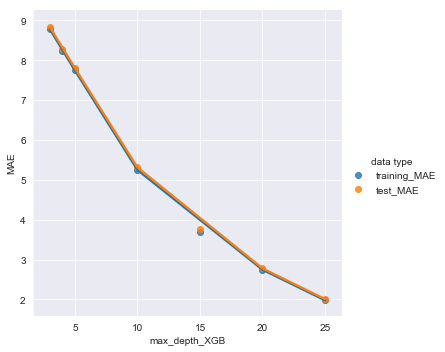

In [140]:
sns.lmplot(x='max_depth_XGB', y='MAE', data=viz_traintest_MAE, hue='data type', lowess=True)

## Visualization

In [80]:
# visualize hyperparameters of XGBoost vs model accuracy
# visualize training vs. test MAE w/ changes params
# visualize fit 

In [526]:
test2 = pd.DataFrame({'predict_y_test': predict_y_test, 'y_test': y_test}).reset_index(drop=True)
test2['residuals'] = test2['predict_y_test'] - test2['y_test']
test2.head()

,predict_y_test,y_test,residuals
0,78.231133,77.956912,0.274221
1,129.140945,130.119423,-0.978477
2,94.292213,93.352615,0.939599
3,129.222321,130.119423,-0.897102
4,94.044617,93.352615,0.692002


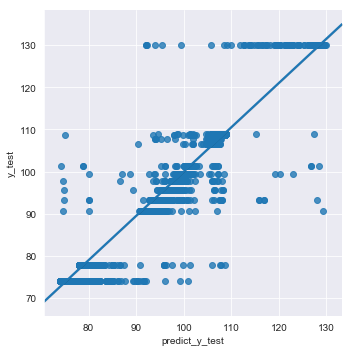

In [527]:
sns.lmplot(x='predict_y_test', y='y_test', data=test2)

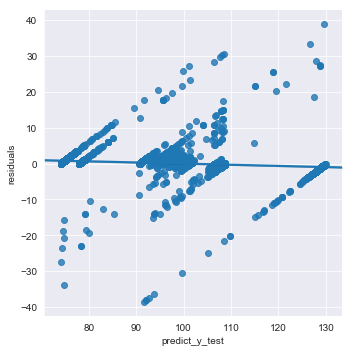

In [504]:
sns.lmplot(x='predict_y_test', y='residuals', data=test2)

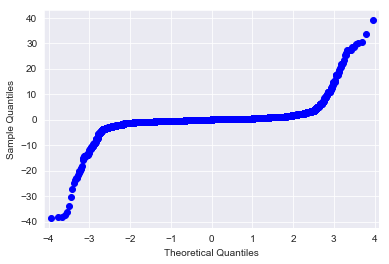

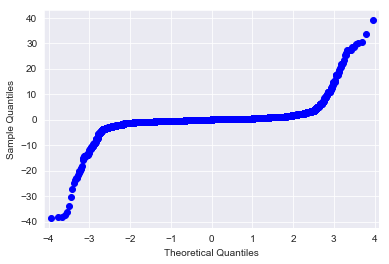

In [505]:
from statsmodels.graphics.gofplots import qqplot
qqplot(test2['residuals'])

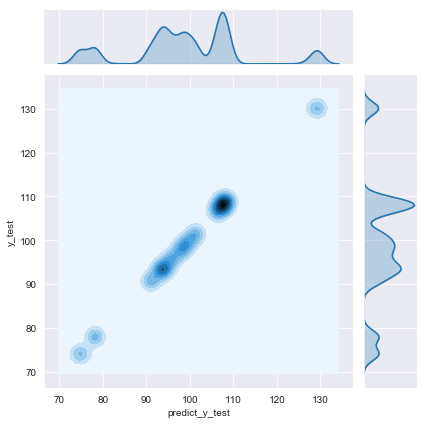

In [506]:
sns.jointplot(x='predict_y_test', y='y_test', kind='kde', data=test2)

In [528]:
for patient in list(telo_data['patient id'].unique()):
    patient_data = telo_data[telo_data['patient id'] == patient]
    actual_4C = patient_data['4 C telo means'].mean()
    predict_4C = model.predict(patient_data[['timepoint', 'individual telomeres']])
    print(f'patient {patient}: ACTUAL telo mean @ 4 C: {actual_4C:.2f} --- PREDICTED telo mean @ 4 C: {np.mean(predict_4C):.2f}')

patient 1: ACTUAL telo mean @ 4 C: 99.35 --- PREDICTED telo mean @ 4 C: 99.40
patient 2: ACTUAL telo mean @ 4 C: 108.92 --- PREDICTED telo mean @ 4 C: 107.88
patient 3: ACTUAL telo mean @ 4 C: 95.67 --- PREDICTED telo mean @ 4 C: 95.95
patient 5: ACTUAL telo mean @ 4 C: 97.83 --- PREDICTED telo mean @ 4 C: 98.17
patient 6: ACTUAL telo mean @ 4 C: 130.12 --- PREDICTED telo mean @ 4 C: 128.45
patient 7: ACTUAL telo mean @ 4 C: 101.40 --- PREDICTED telo mean @ 4 C: 101.38
patient 8: ACTUAL telo mean @ 4 C: 106.65 --- PREDICTED telo mean @ 4 C: 106.12
patient 9: ACTUAL telo mean @ 4 C: 107.68 --- PREDICTED telo mean @ 4 C: 107.10
patient 10: ACTUAL telo mean @ 4 C: 93.35 --- PREDICTED telo mean @ 4 C: 94.48
patient 11: ACTUAL telo mean @ 4 C: 108.57 --- PREDICTED telo mean @ 4 C: 107.68
patient 12: ACTUAL telo mean @ 4 C: 73.99 --- PREDICTED telo mean @ 4 C: 75.48
patient 14: ACTUAL telo mean @ 4 C: 93.28 --- PREDICTED telo mean @ 4 C: 93.61
patient 15: ACTUAL telo mean @ 4 C: 90.68 --- PR

In [349]:
training_MAE = []
test_MAE = []
max_depth_XGB = [1, 2, 5, 10, 15, 20, 25, 30, 40, 50, 60]

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, random_state=0)

y_test = test['4 C telo means']
X_test = test[['timepoint', 'individual telomeres']]

for param in max_depth_XGB:
    model = XGBRegressor(max_depth=param, learning_rate=0.1, n_estimators=100, objective='reg:squarederror')
    model.fit(X_train, y_train)
    
    predict_y_val = model.predict(X_val)
    training_MAE.append(mean_absolute_error(predict_y_val, y_val))
    
    predict_y_test = model.predict(X_test)
    test_MAE.append(mean_absolute_error(predict_y_test, y_test))

In [402]:
viz_traintest_MAE = pd.DataFrame({'training_MAE': training_MAE,
                                  'test_MAE': test_MAE,
                                  'max_depth_XGB': max_depth_XGB})

In [403]:
viz_traintest_MAE = viz_traintest_MAE.melt(id_vars='max_depth_XGB',
                                           value_vars=['training_MAE', 'test_MAE'],
                                           var_name='data type',
                                           value_name='MAE'
                                           )
viz_traintest_MAE.head()

,max_depth_XGB,data type,MAE
0,1,training_MAE,9.495657
1,2,training_MAE,9.104537
2,5,training_MAE,7.794592
3,10,training_MAE,5.270706
4,15,training_MAE,3.871727


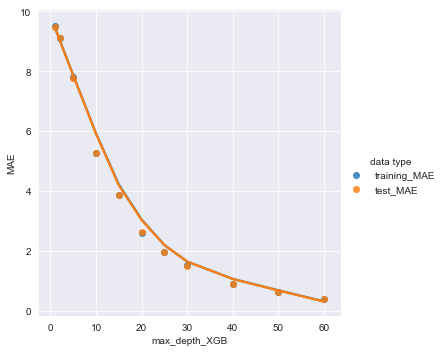

In [411]:
sns.lmplot(x='max_depth_XGB', y='MAE', data=viz_traintest_MAE, hue='data type', lowess=True)